# Section 17: Random Forests

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_absolute_error, root_mean_squared_error

## Classification with Random Forest

In [2]:
df = pd.read_csv('penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df = df.dropna()

In [5]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)

In [7]:
y = df['species']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
rfc = RandomForestClassifier(n_estimators=10, max_features='sqrt', random_state=101)

In [10]:
rfc.fit(X_train ,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [11]:
y_pred = rfc.predict(X_test)

In [12]:
cm = confusion_matrix(y_test, y_pred)

In [13]:
disp = ConfusionMatrixDisplay(cm)

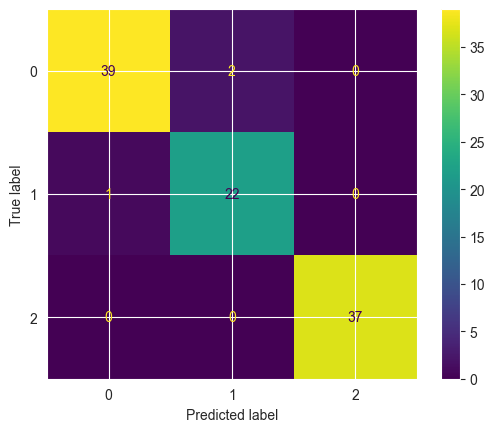

In [14]:
disp.plot()

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



In [16]:
df = pd.read_csv('data_banknote_authentication.csv')

In [17]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


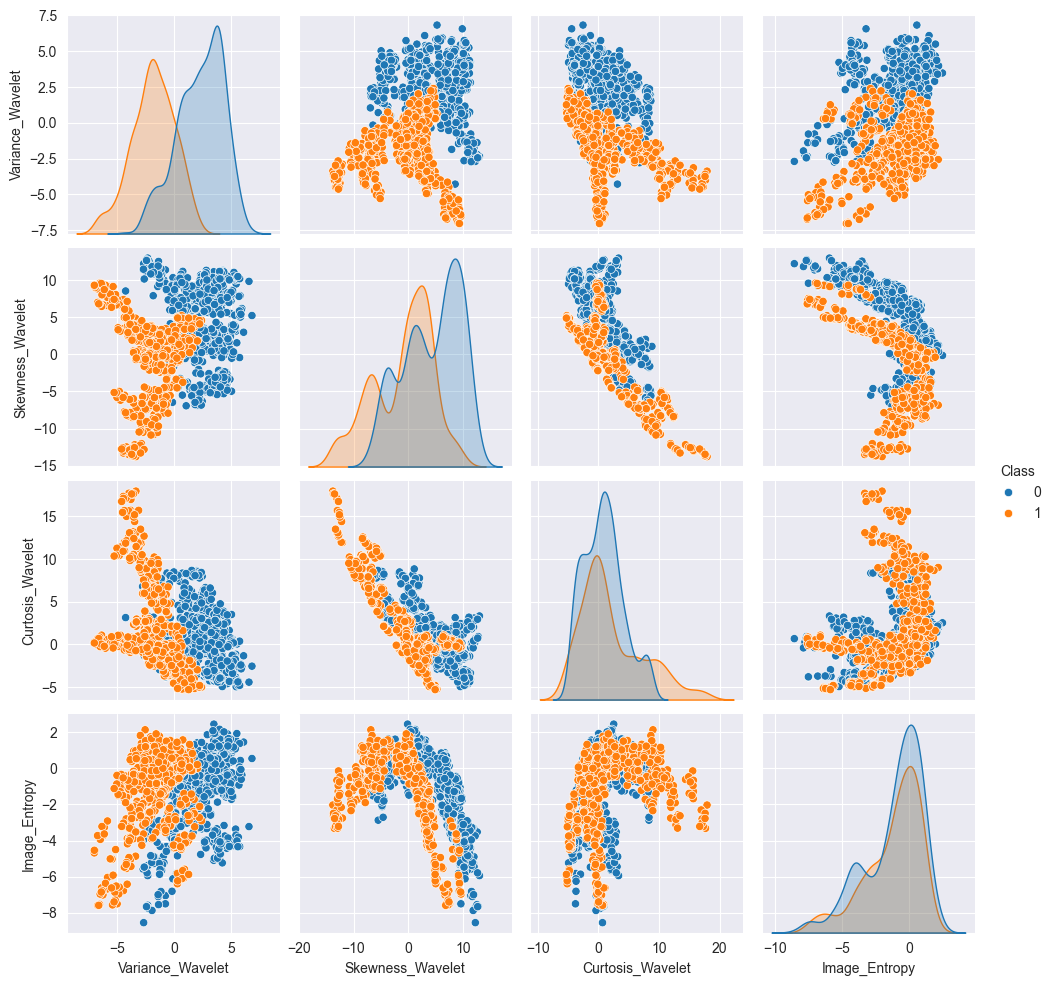

In [18]:
sns.pairplot(df, hue='Class')

In [19]:
X = df.drop('Class', axis=1)

In [20]:
y = df['Class']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [22]:
n_estimators = [64, 100, 128, 200]
max_features = [2, 3, 4]
bootstrap = [True, False]

In [23]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'bootstrap': bootstrap
}

In [24]:
grid = GridSearchCV(rfc, param_grid)

In [25]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=10,
                                              random_state=101),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200]})

In [26]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128}

In [27]:
rfc = RandomForestClassifier(max_features=2, n_estimators=128, oob_score=True)

In [28]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=128, oob_score=True)

In [29]:
rfc.oob_score_

0.9939965694682675

In [30]:
y_pred = rfc.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



In [32]:
cm = confusion_matrix(y_test, y_pred)

In [33]:
disp = ConfusionMatrixDisplay(cm)

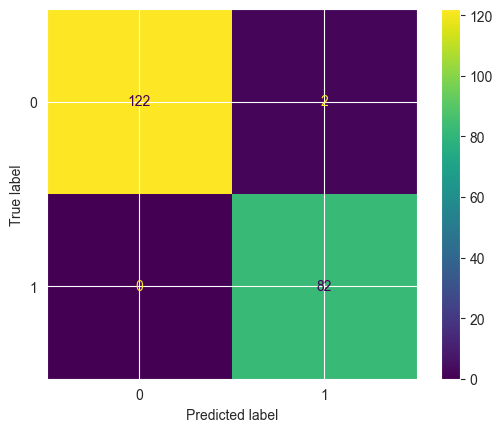

In [34]:
disp.plot()

In [35]:
errors = []
misclassifications = []

for n in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=n, max_features=2)
    
    rfc.fit(X_train, y_train)
    
    y_pred = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test, y_pred)
    n_missed = np.sum(y_pred != y_test)
    
    errors.append(err)
    misclassifications.append(n_missed)

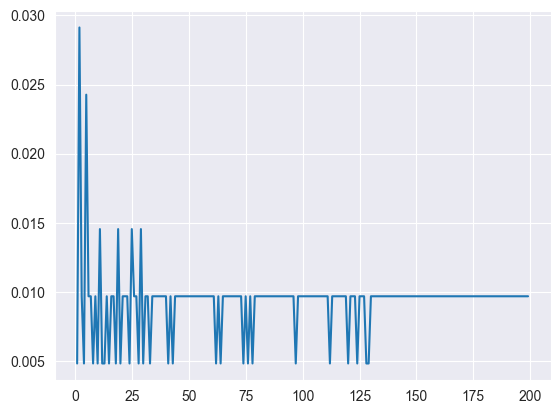

In [36]:
plt.plot(range(1, 200), errors)

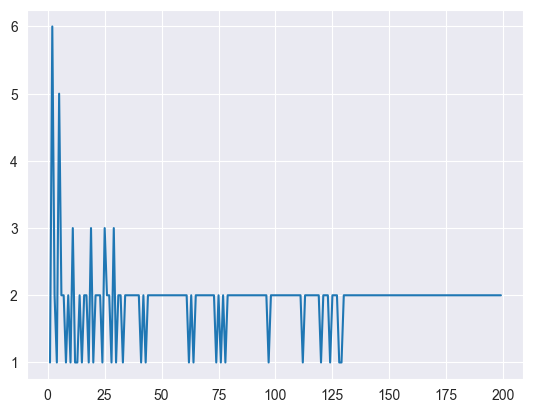

In [37]:
plt.plot(range(1, 200), misclassifications)

## Regression with Different Types of Models

In [38]:
df = pd.read_csv('rock_density_xray.csv')

In [39]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [40]:
df.columns = ['Signal', 'Density']

<AxesSubplot: xlabel='Signal', ylabel='Density'>

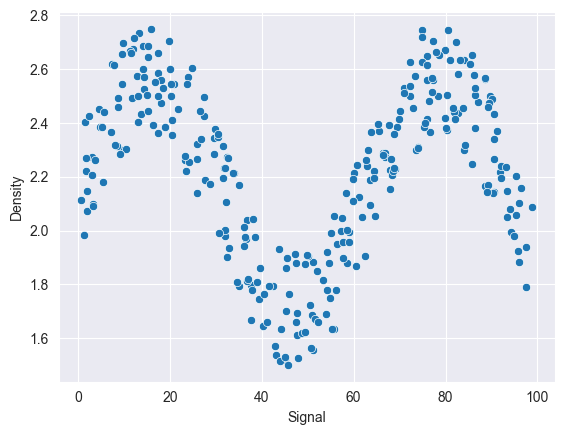

In [41]:
sns.scatterplot(df, x='Signal', y='Density')

In [42]:
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [44]:
lr_model = LinearRegression()

In [45]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [46]:
lr_pred = lr_model.predict(X_test)

In [47]:
lr_pred

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [48]:
mean_absolute_error(y_test, lr_pred)

0.211198973318633

In [49]:
root_mean_squared_error(y_test, lr_pred)

0.2570051996584629

In [50]:
signal_range = np.arange(0, 100)
signal_pred = lr_model.predict(signal_range.reshape(-1,1))

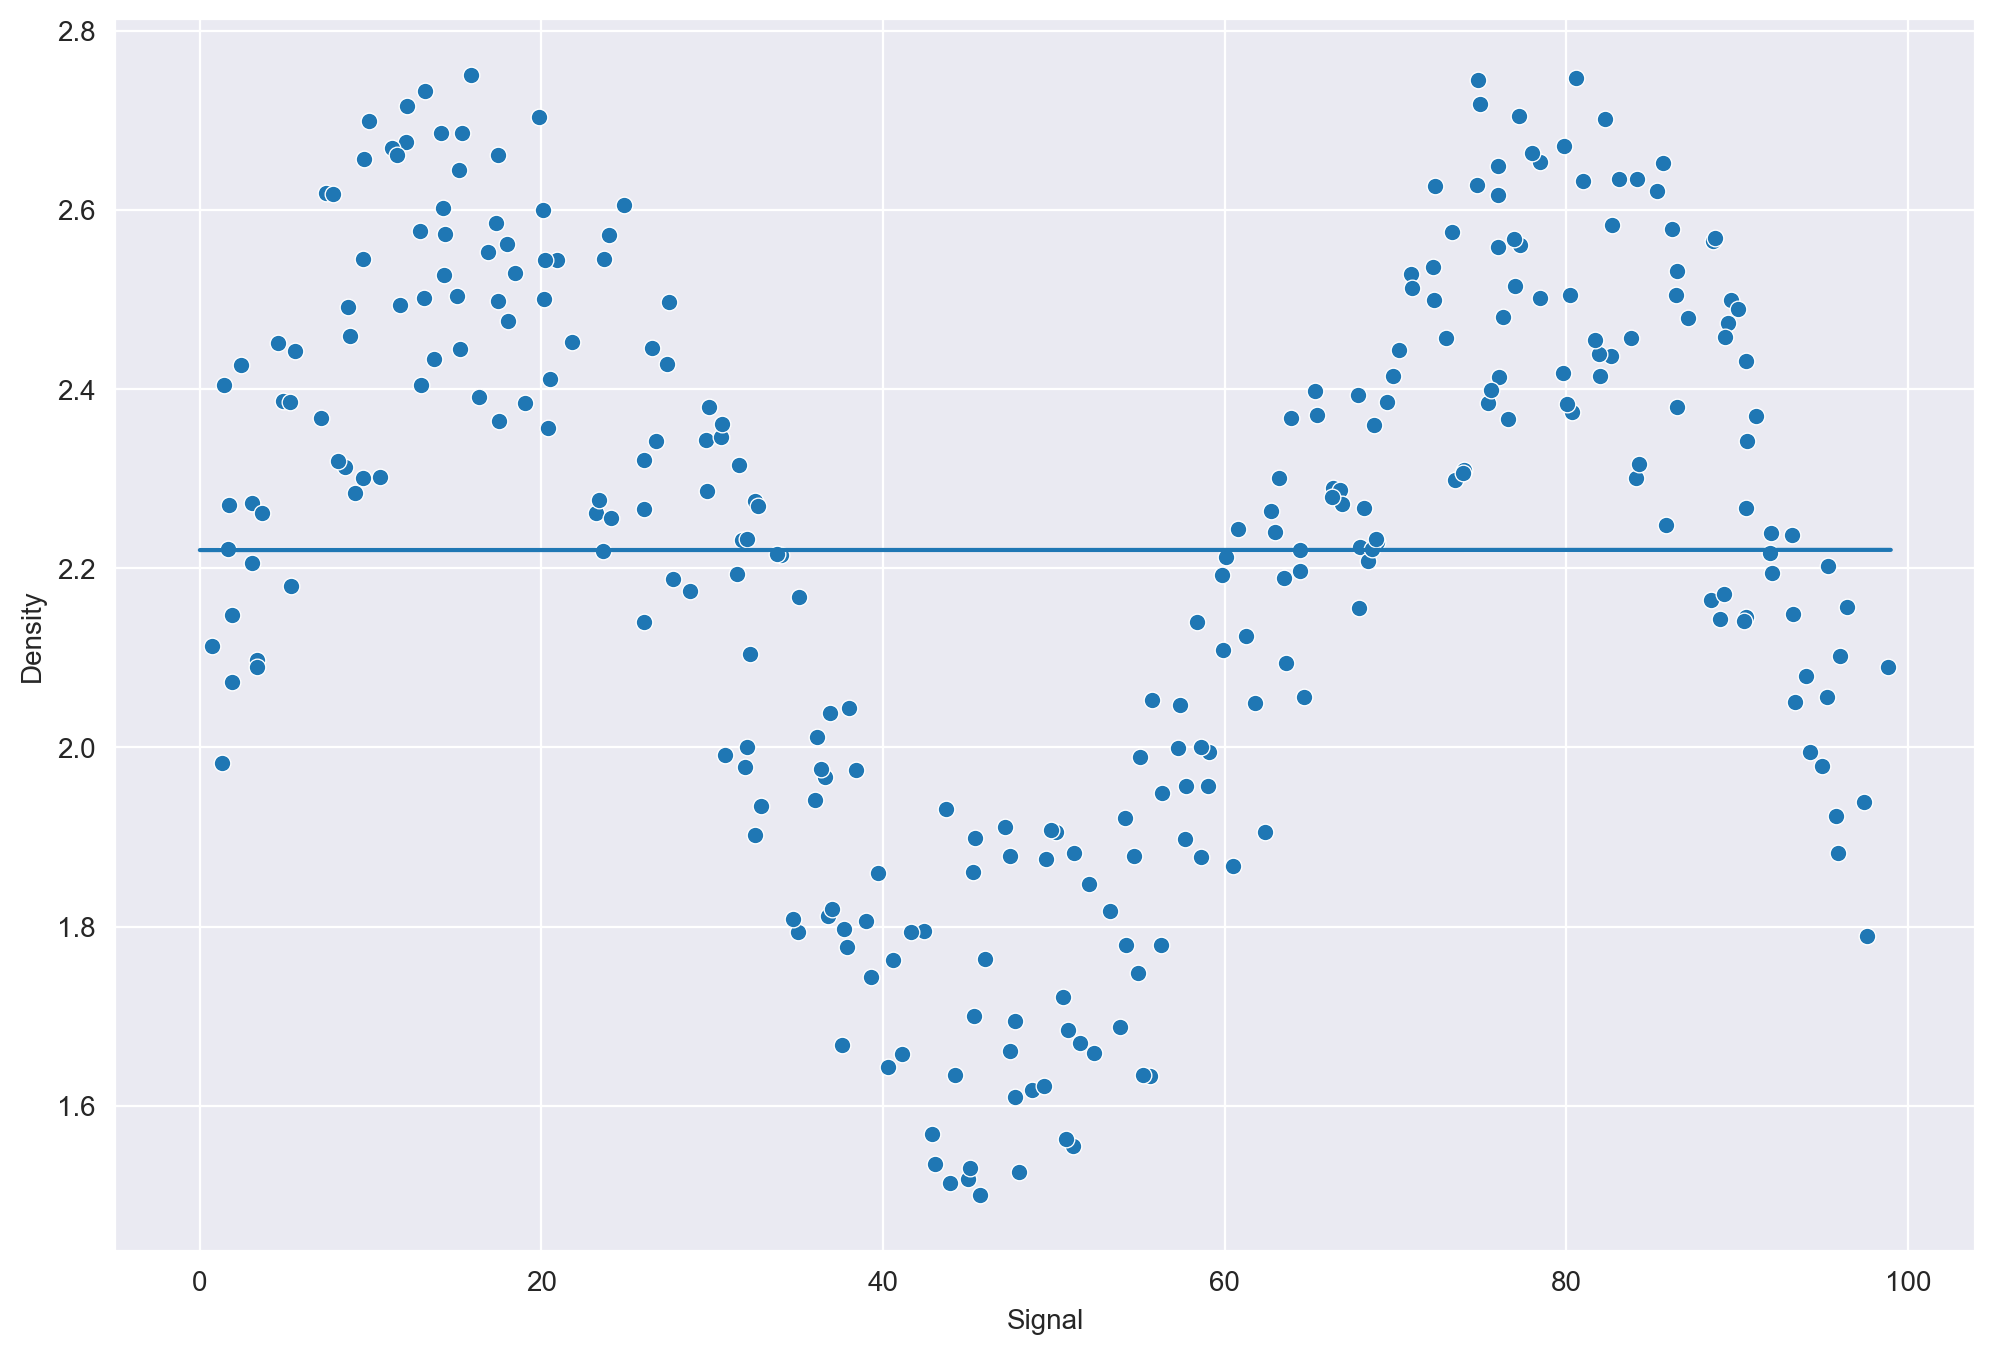

In [51]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(df, x='Signal', y='Density')
plt.plot(signal_range, signal_pred)

In [52]:
def run_model(model_param, x_train_param, y_train_param, x_test_param, y_test_param):
    model_param.fit(x_train_param, y_train_param)
    
    y_pred_local = model_param.predict(x_test_param)

    mae = mean_absolute_error(y_test_param, y_pred_local)
    rmse = root_mean_squared_error(y_test_param, y_pred_local)
    
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    
    signal_range_local = np.arange(0, 100)
    signal_pred_local = model_param.predict(signal_range_local.reshape(-1, 1))
    
    plt.figure(figsize=(12, 8), dpi=200)
    sns.scatterplot(df, x='Signal', y='Density', color='black')
    plt.plot(signal_range_local, signal_pred_local)

MAE: 0.211198973318633
RMSE: 0.2570051996584629


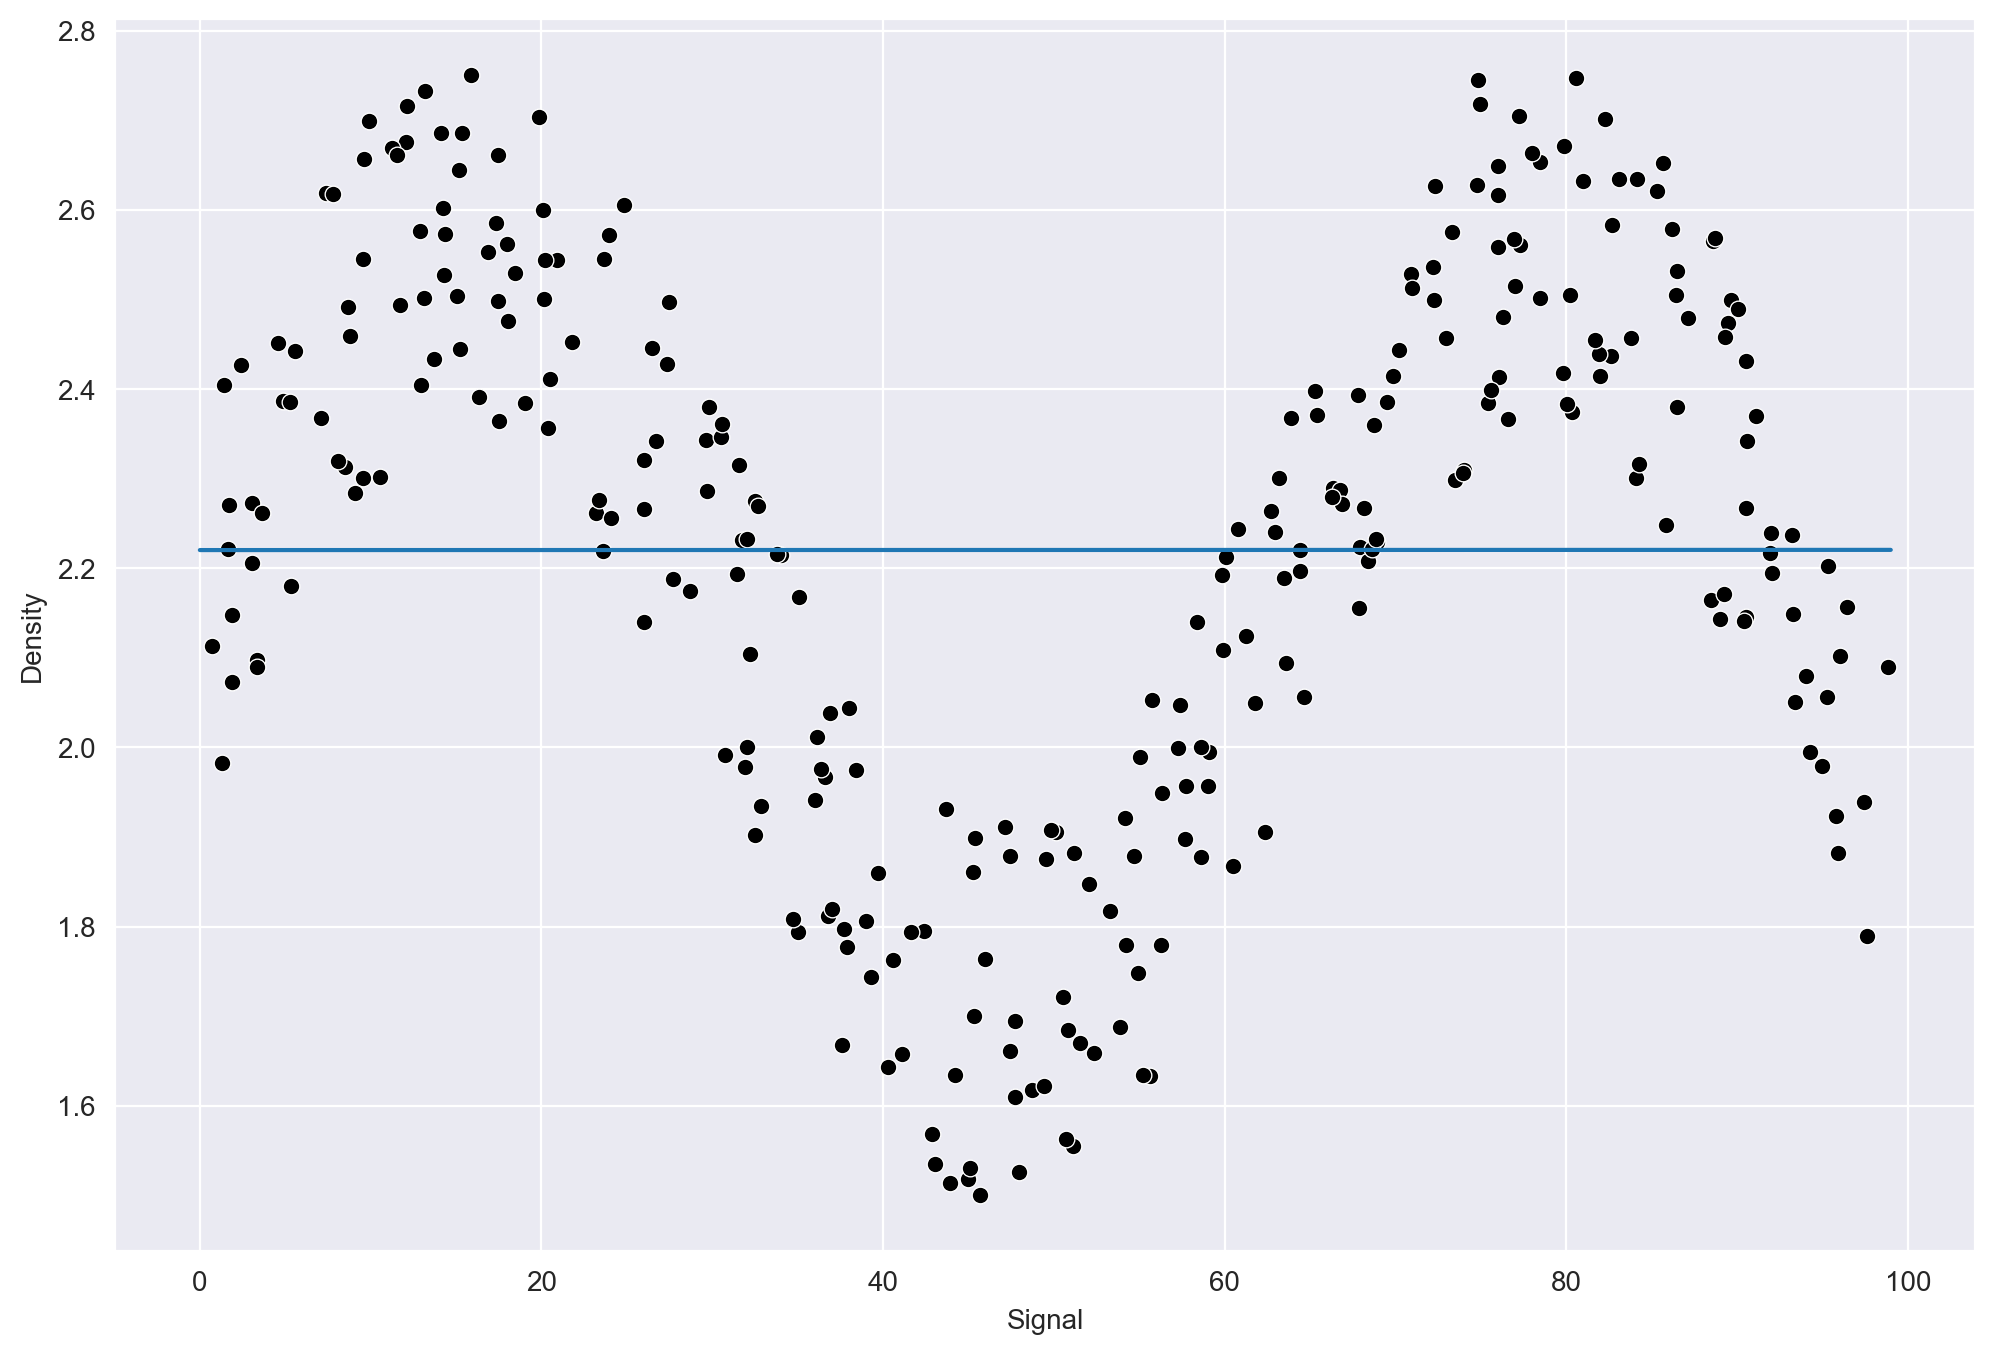

In [53]:
model = LinearRegression()

run_model(model, X_train, y_train, X_test, y_test)

In [54]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

MAE: 0.11969216051809596
RMSE: 0.13807594749211474


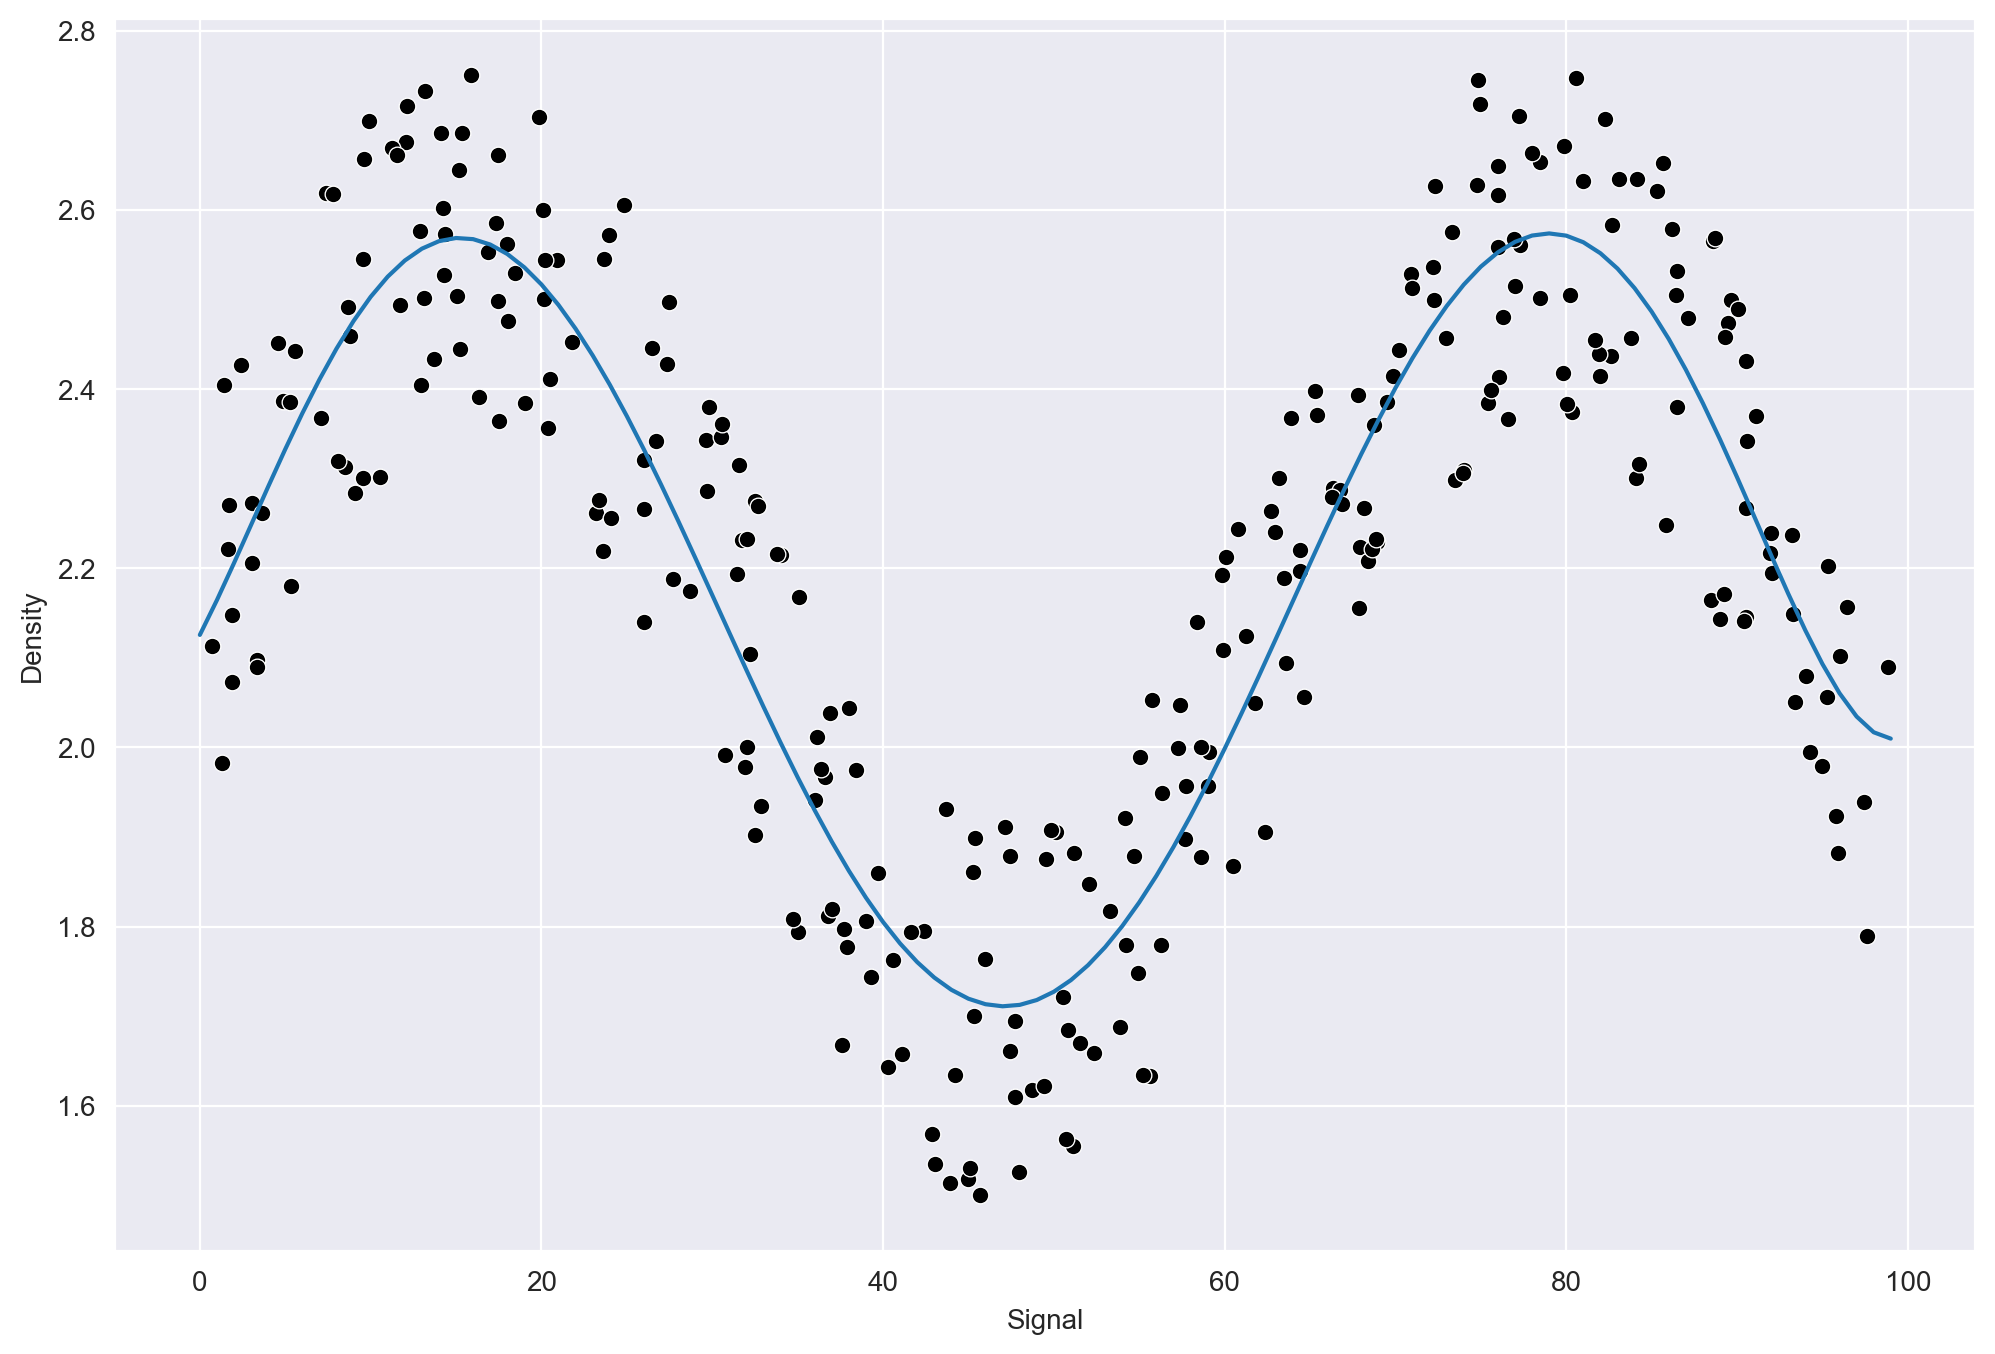

In [55]:
run_model(pipe, X_train, y_train, X_test, y_test)

MAE: 0.11877297474442378
RMSE: 0.1523487028635337
MAE: 0.12198383614100558
RMSE: 0.13730685016923647
MAE: 0.11635971693292672
RMSE: 0.13277855732740926
MAE: 0.1570937980156112
RMSE: 0.19545005360281248


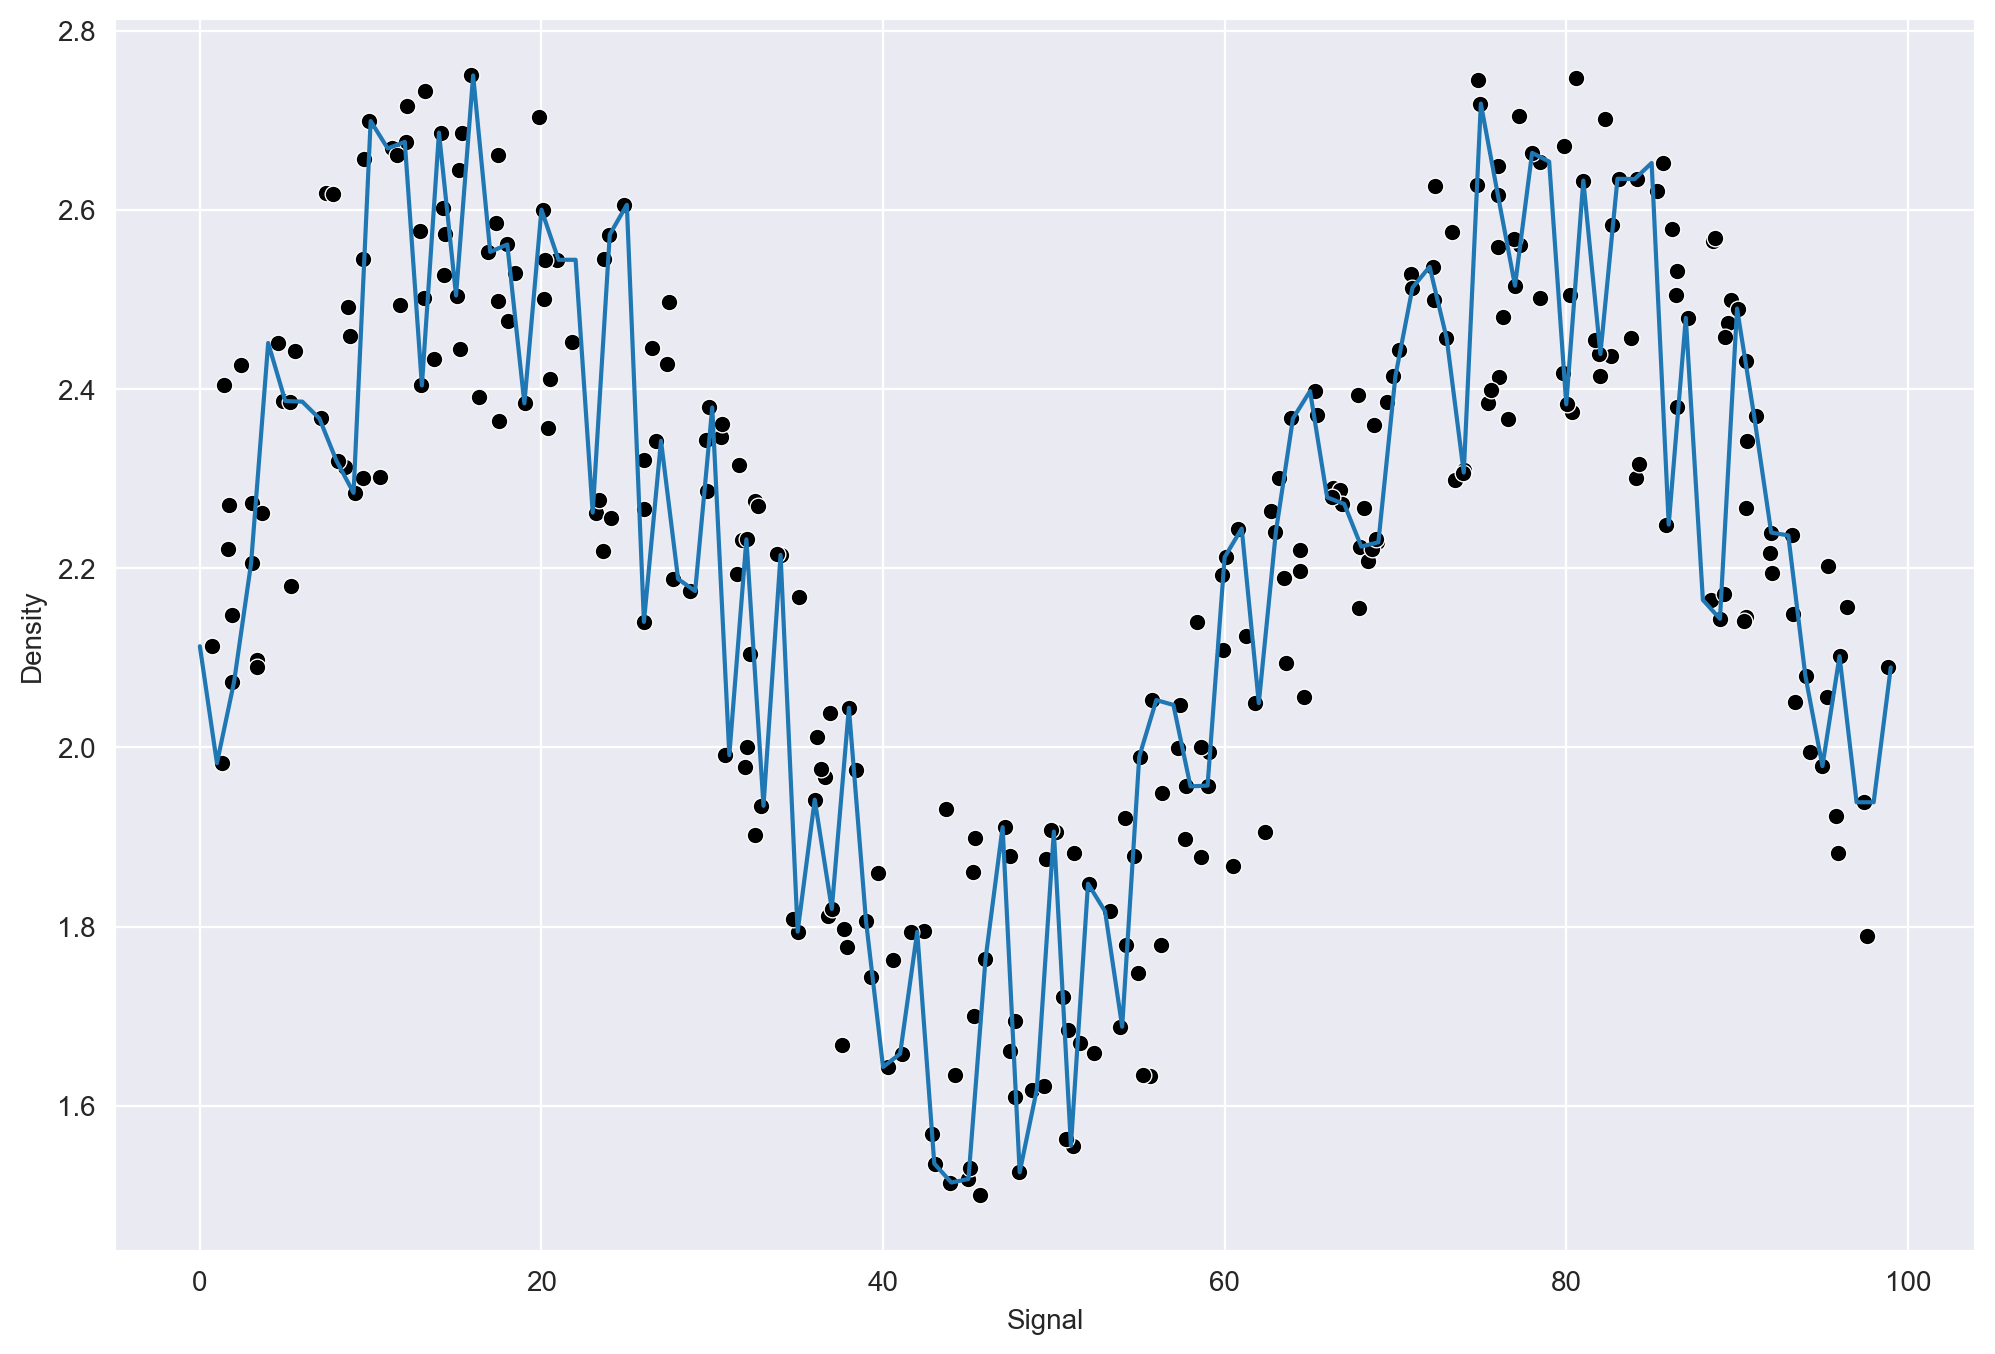

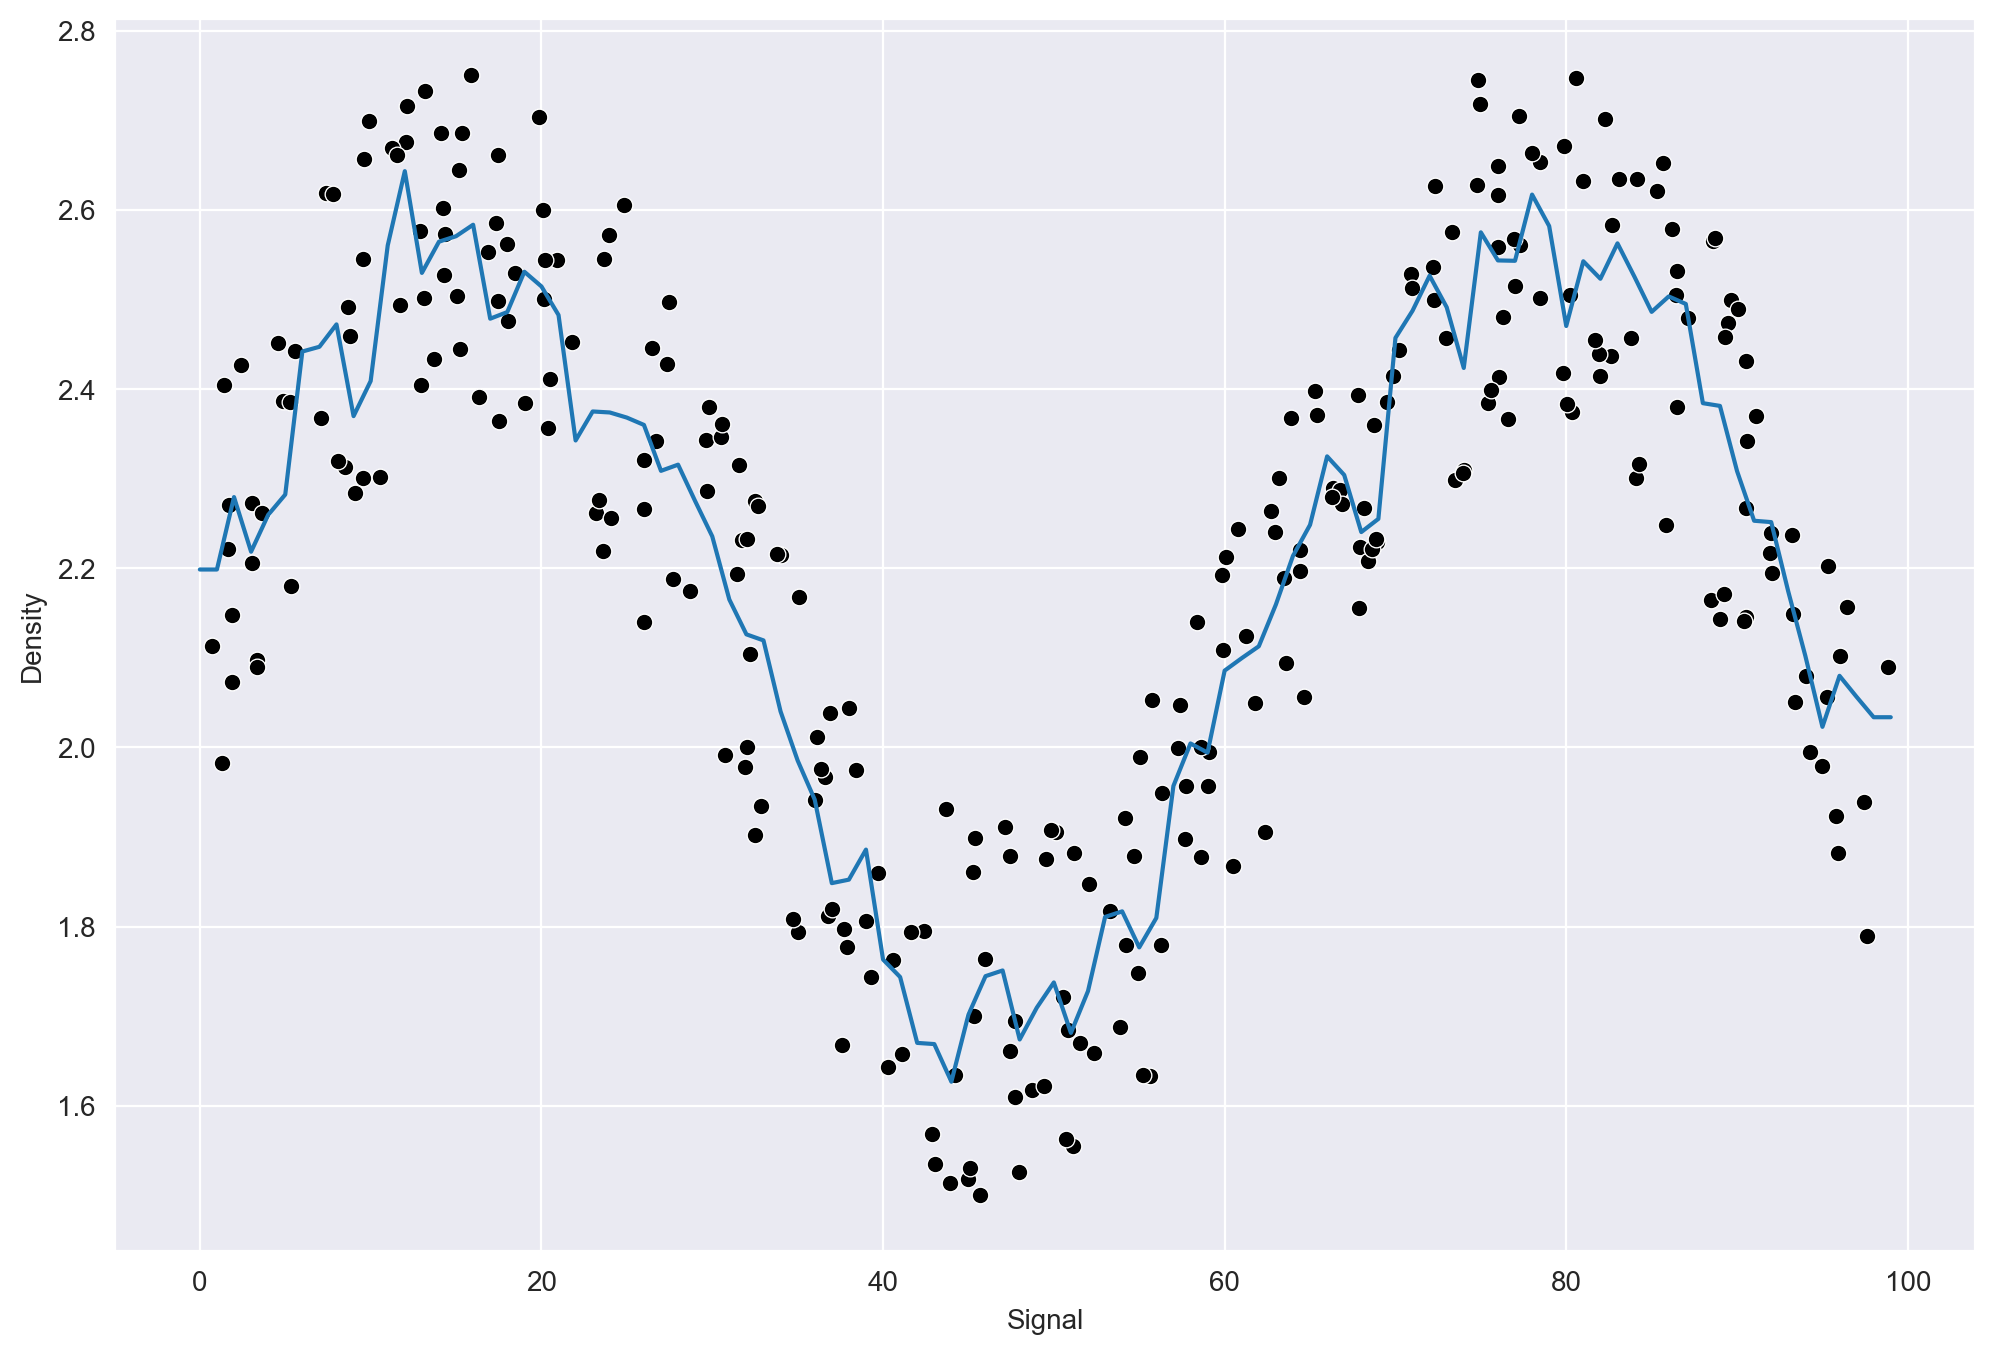

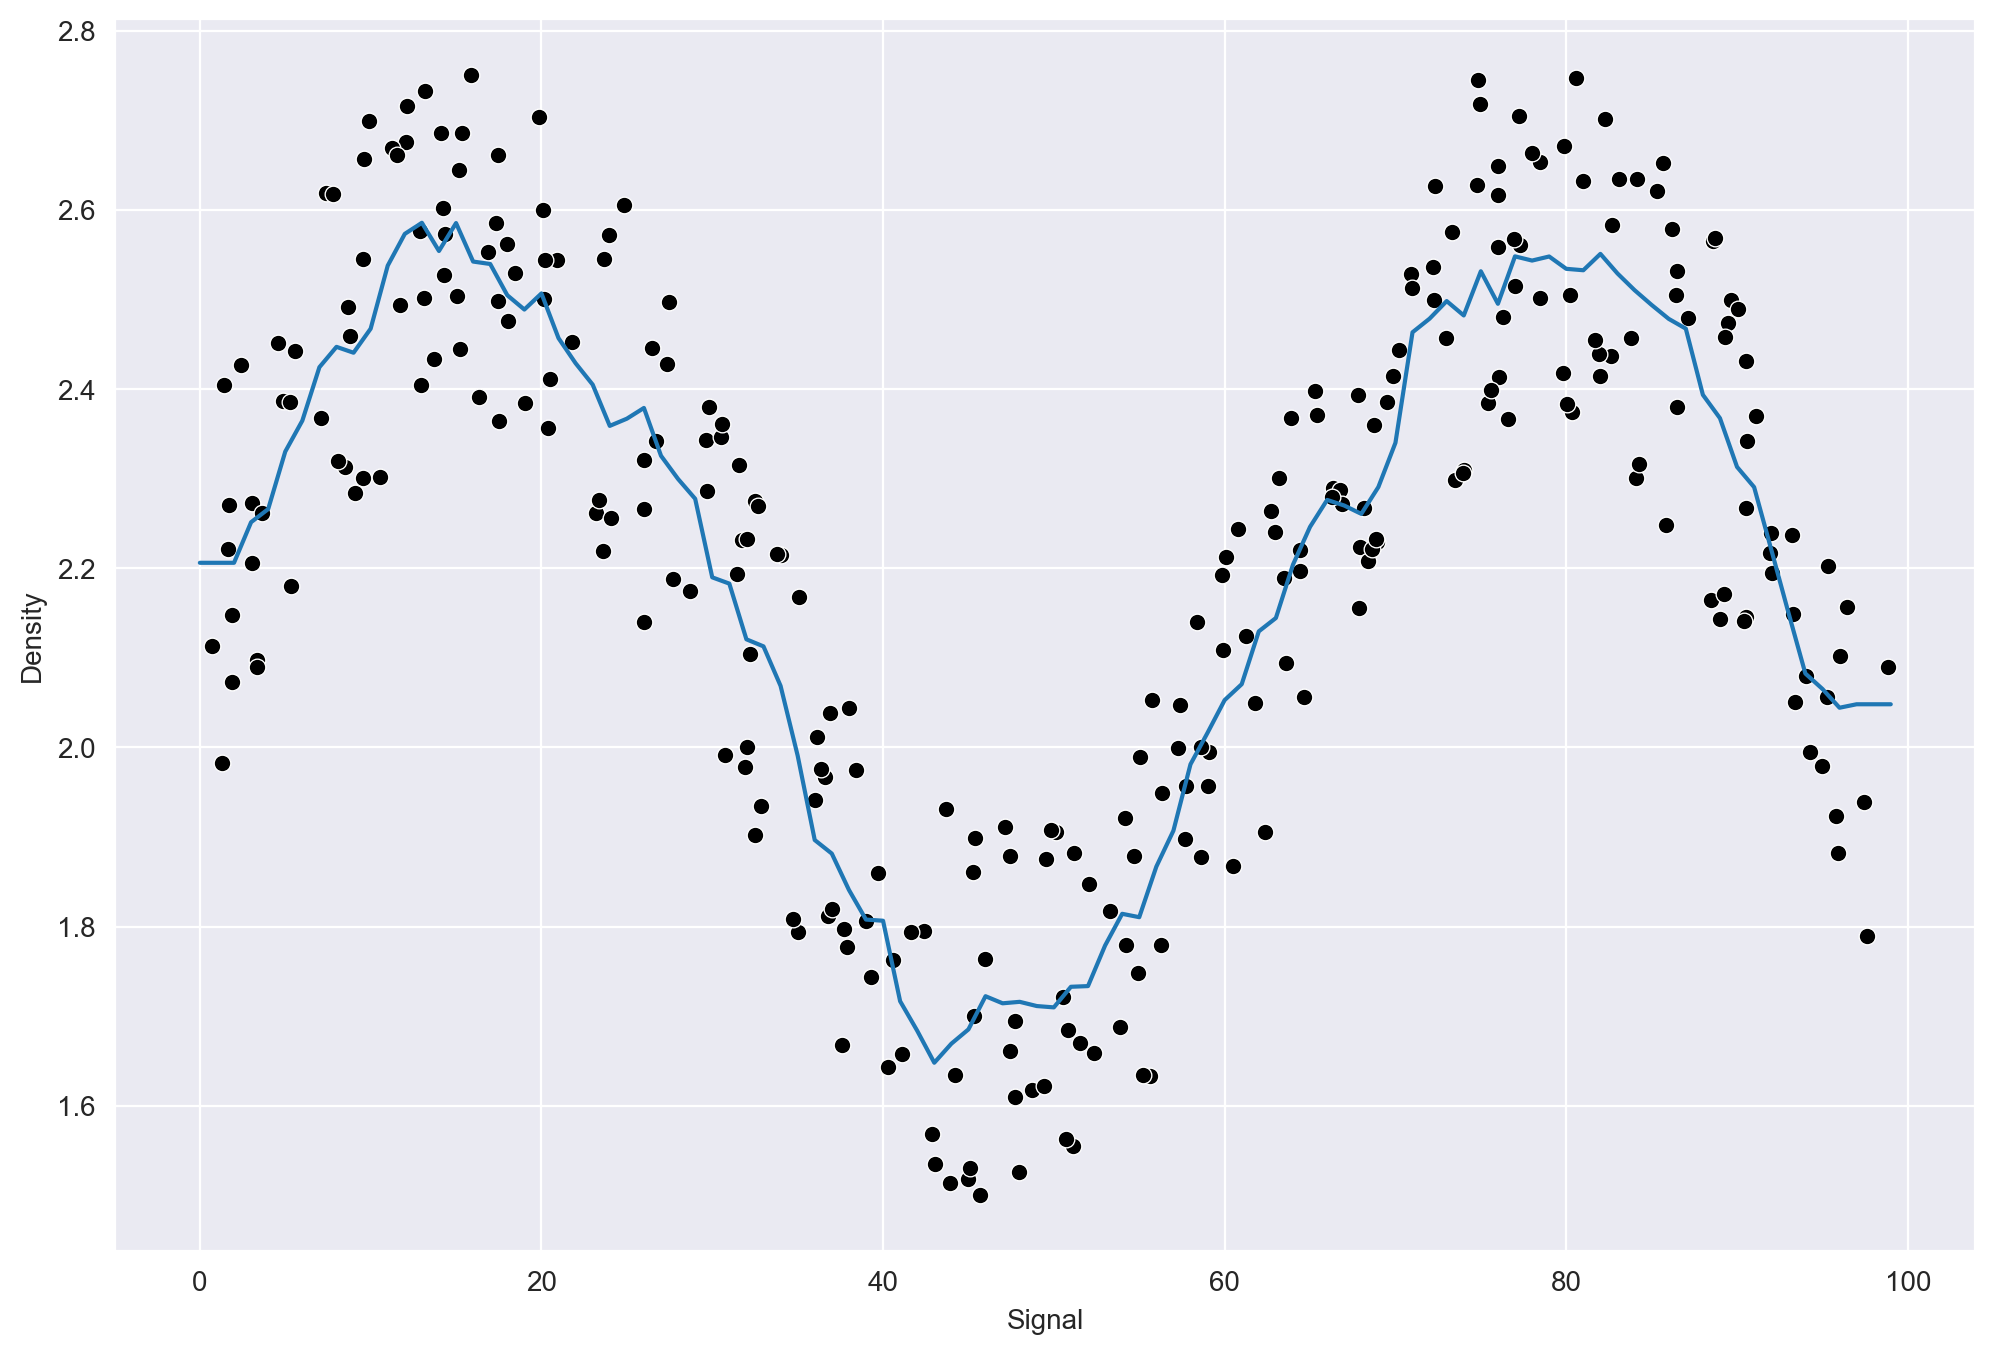

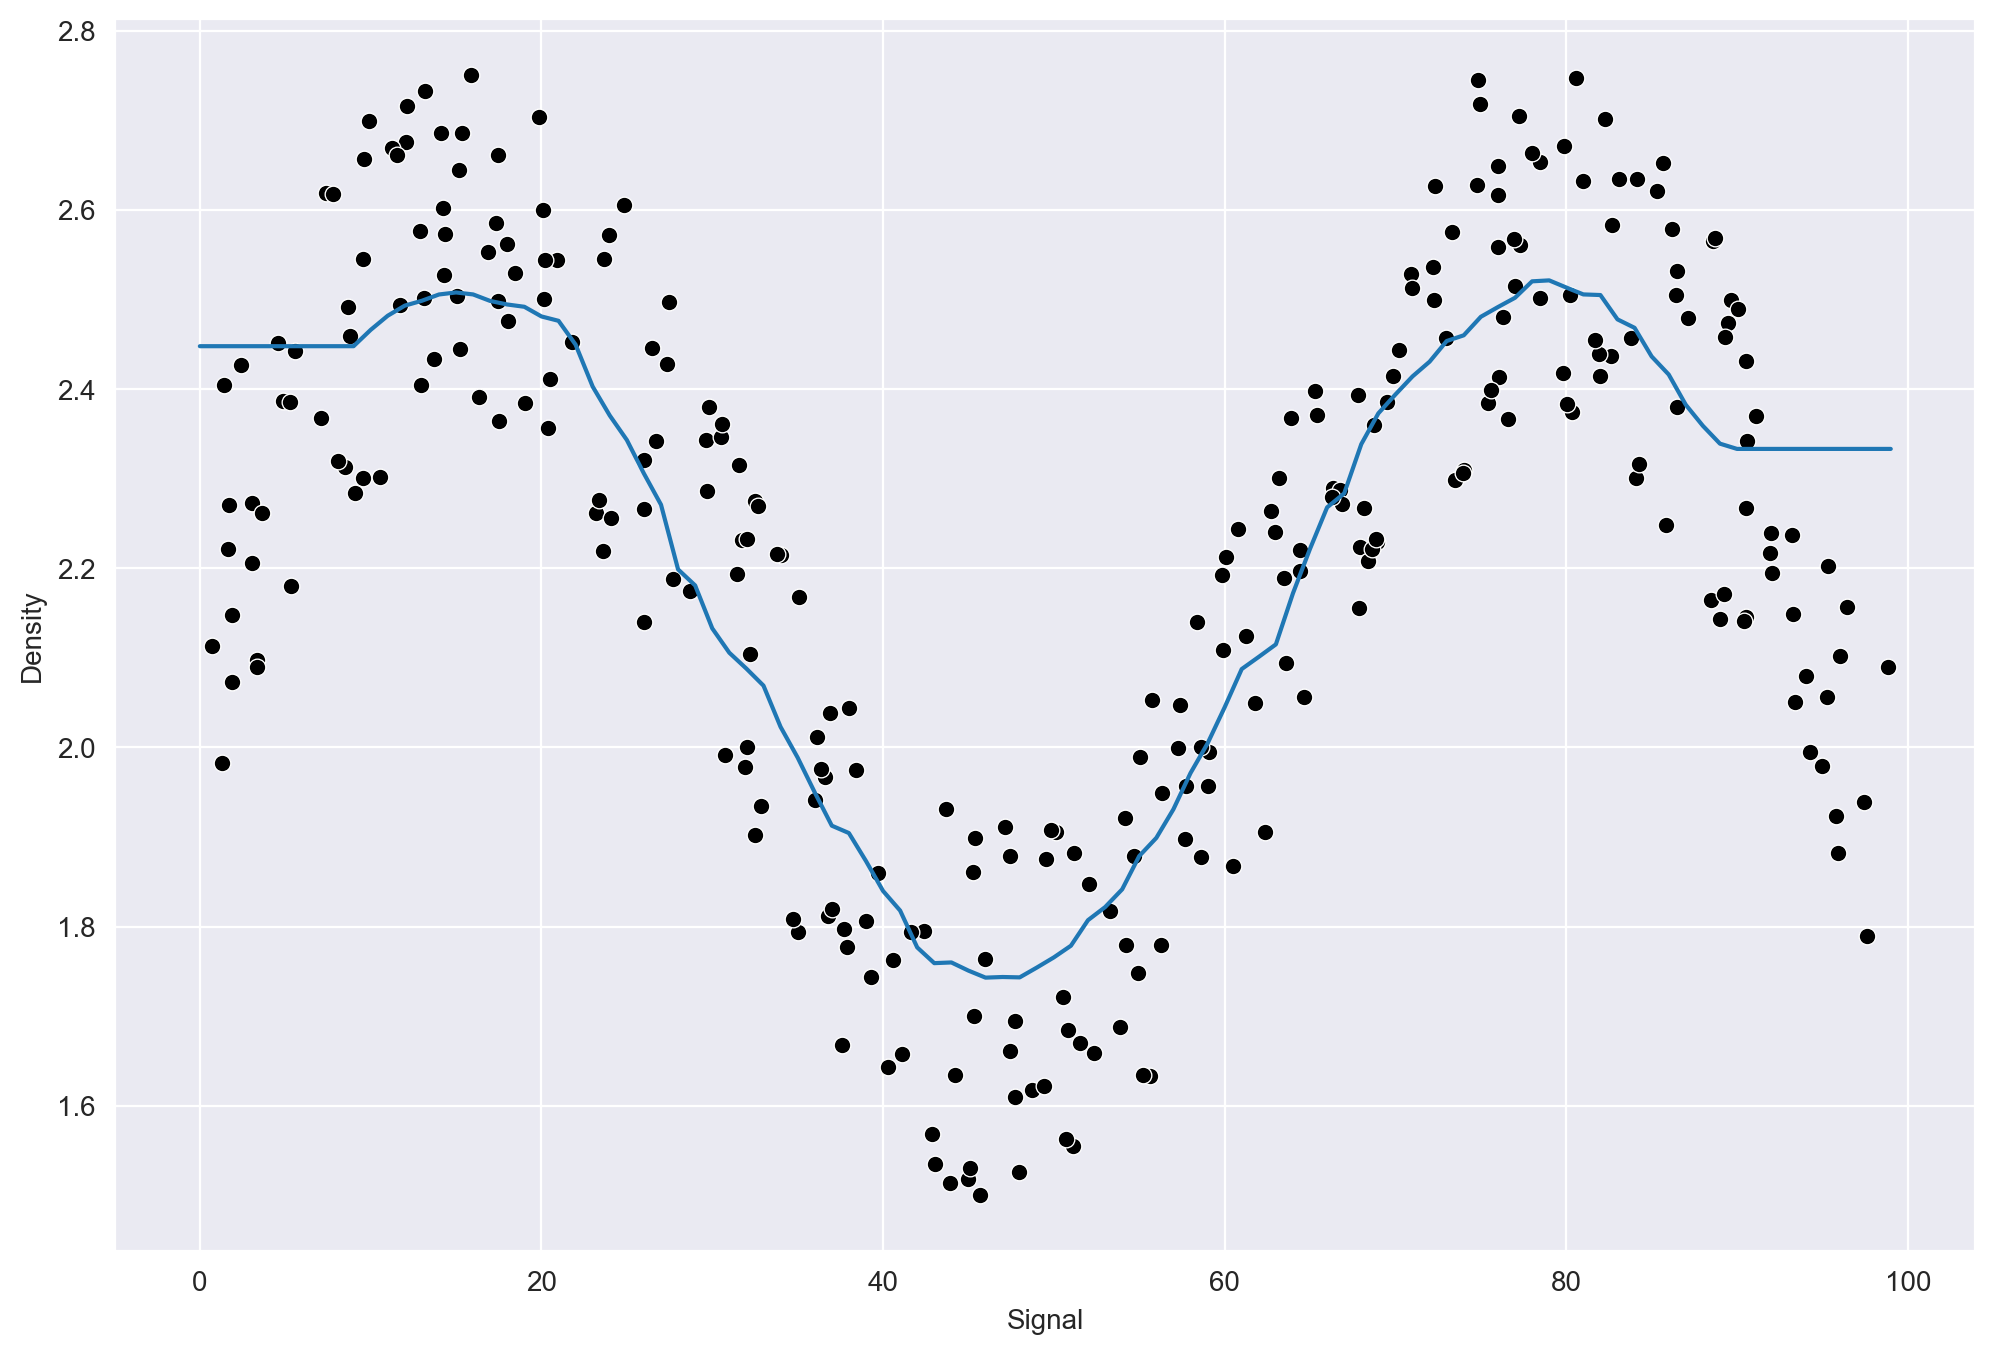

In [56]:
k_values = [1, 5, 10, 50]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    
    run_model(model, X_train, y_train, X_test, y_test)

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


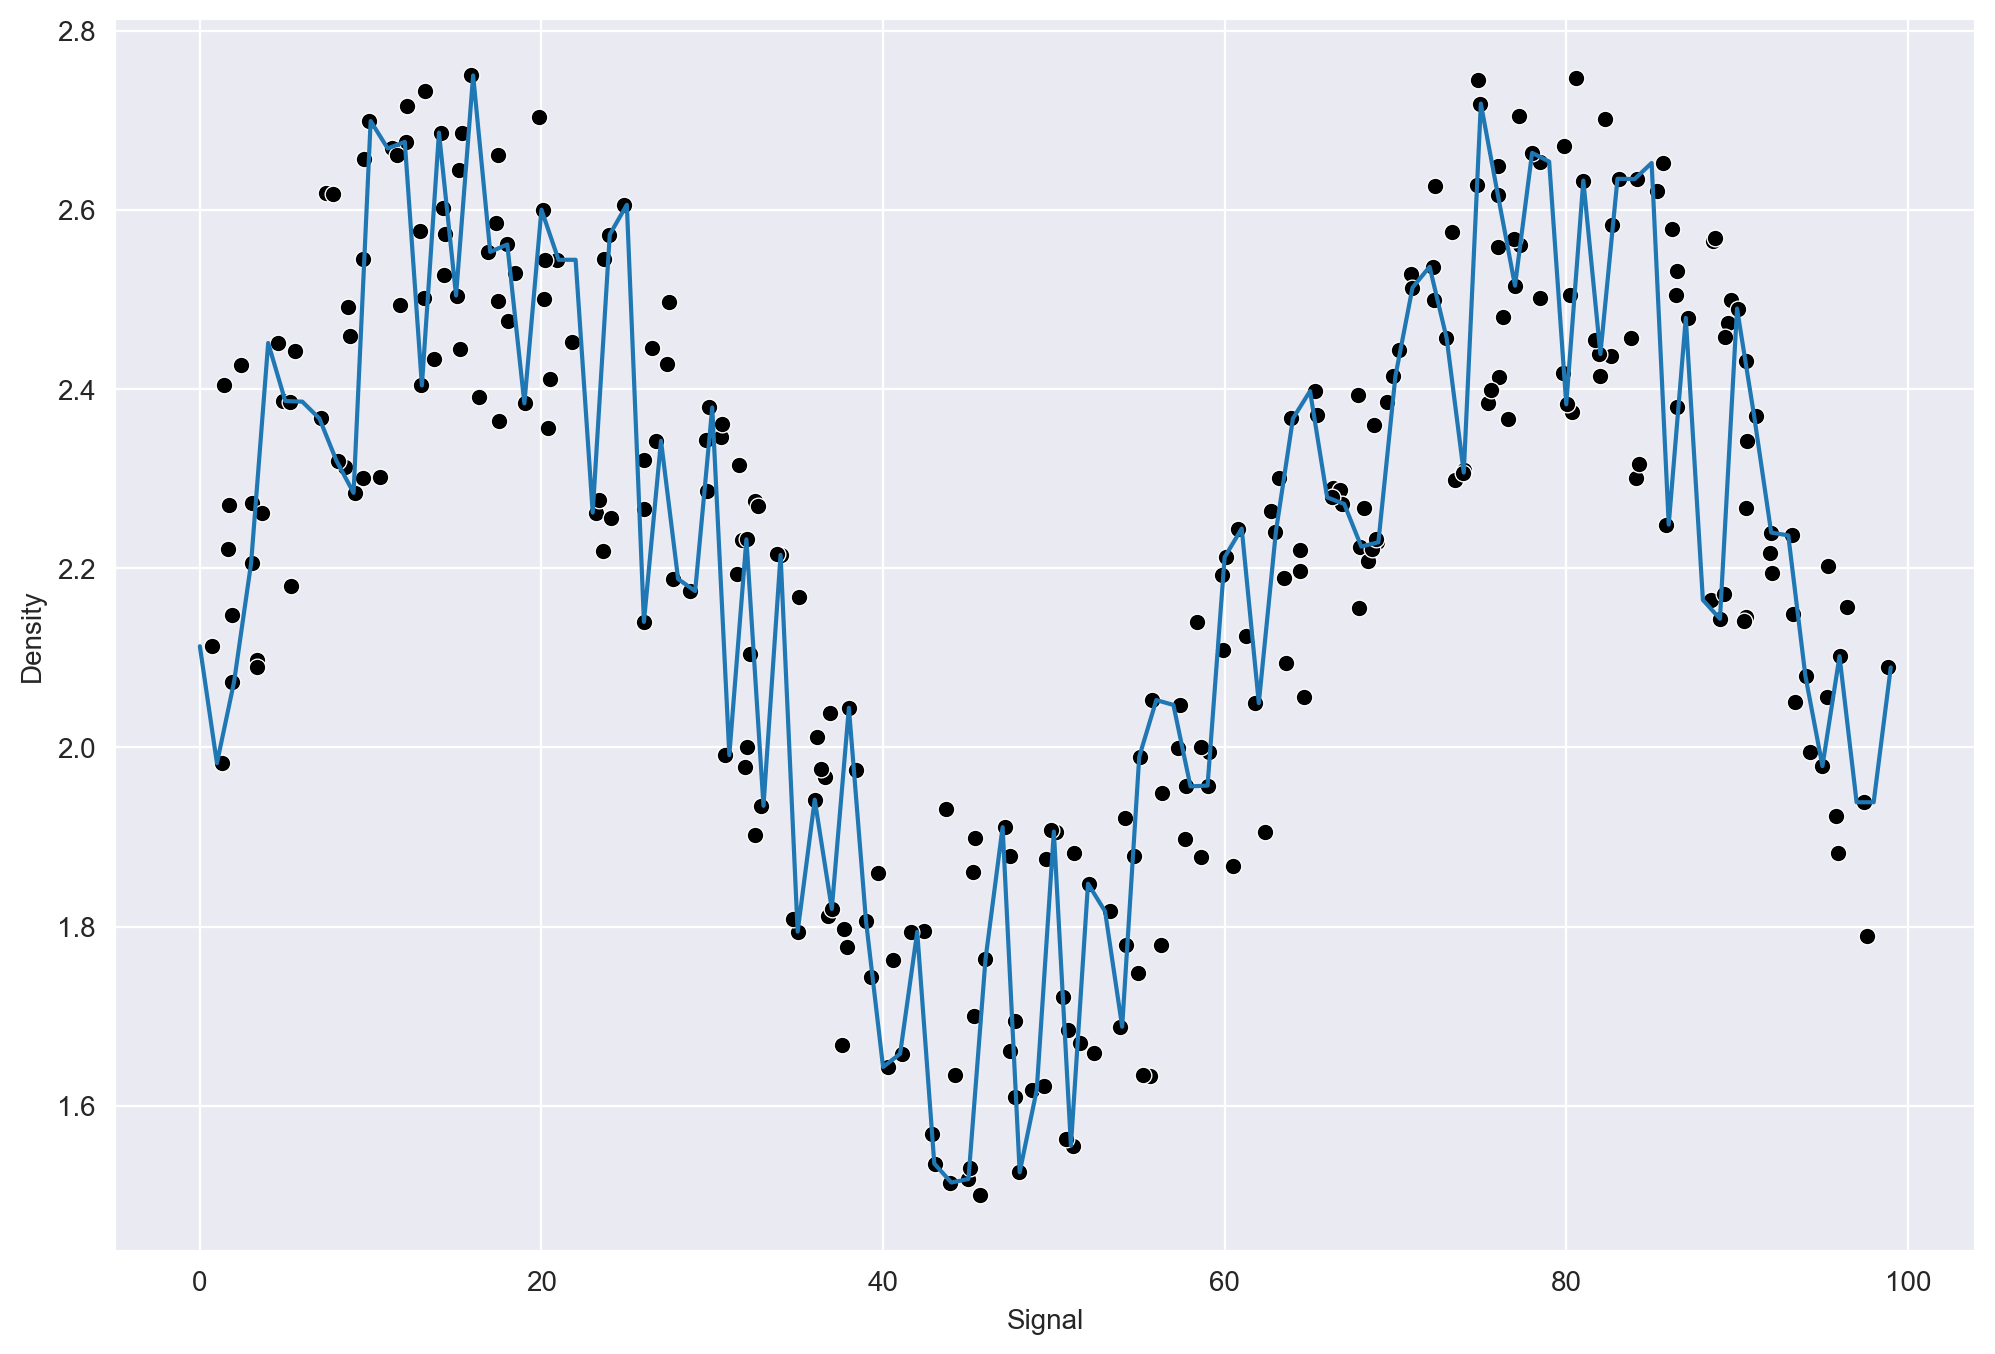

In [57]:
model = DecisionTreeRegressor()

run_model(model, X_train, y_train, X_test, y_test)

MAE: 0.12017510123813935
RMSE: 0.13498358709618383


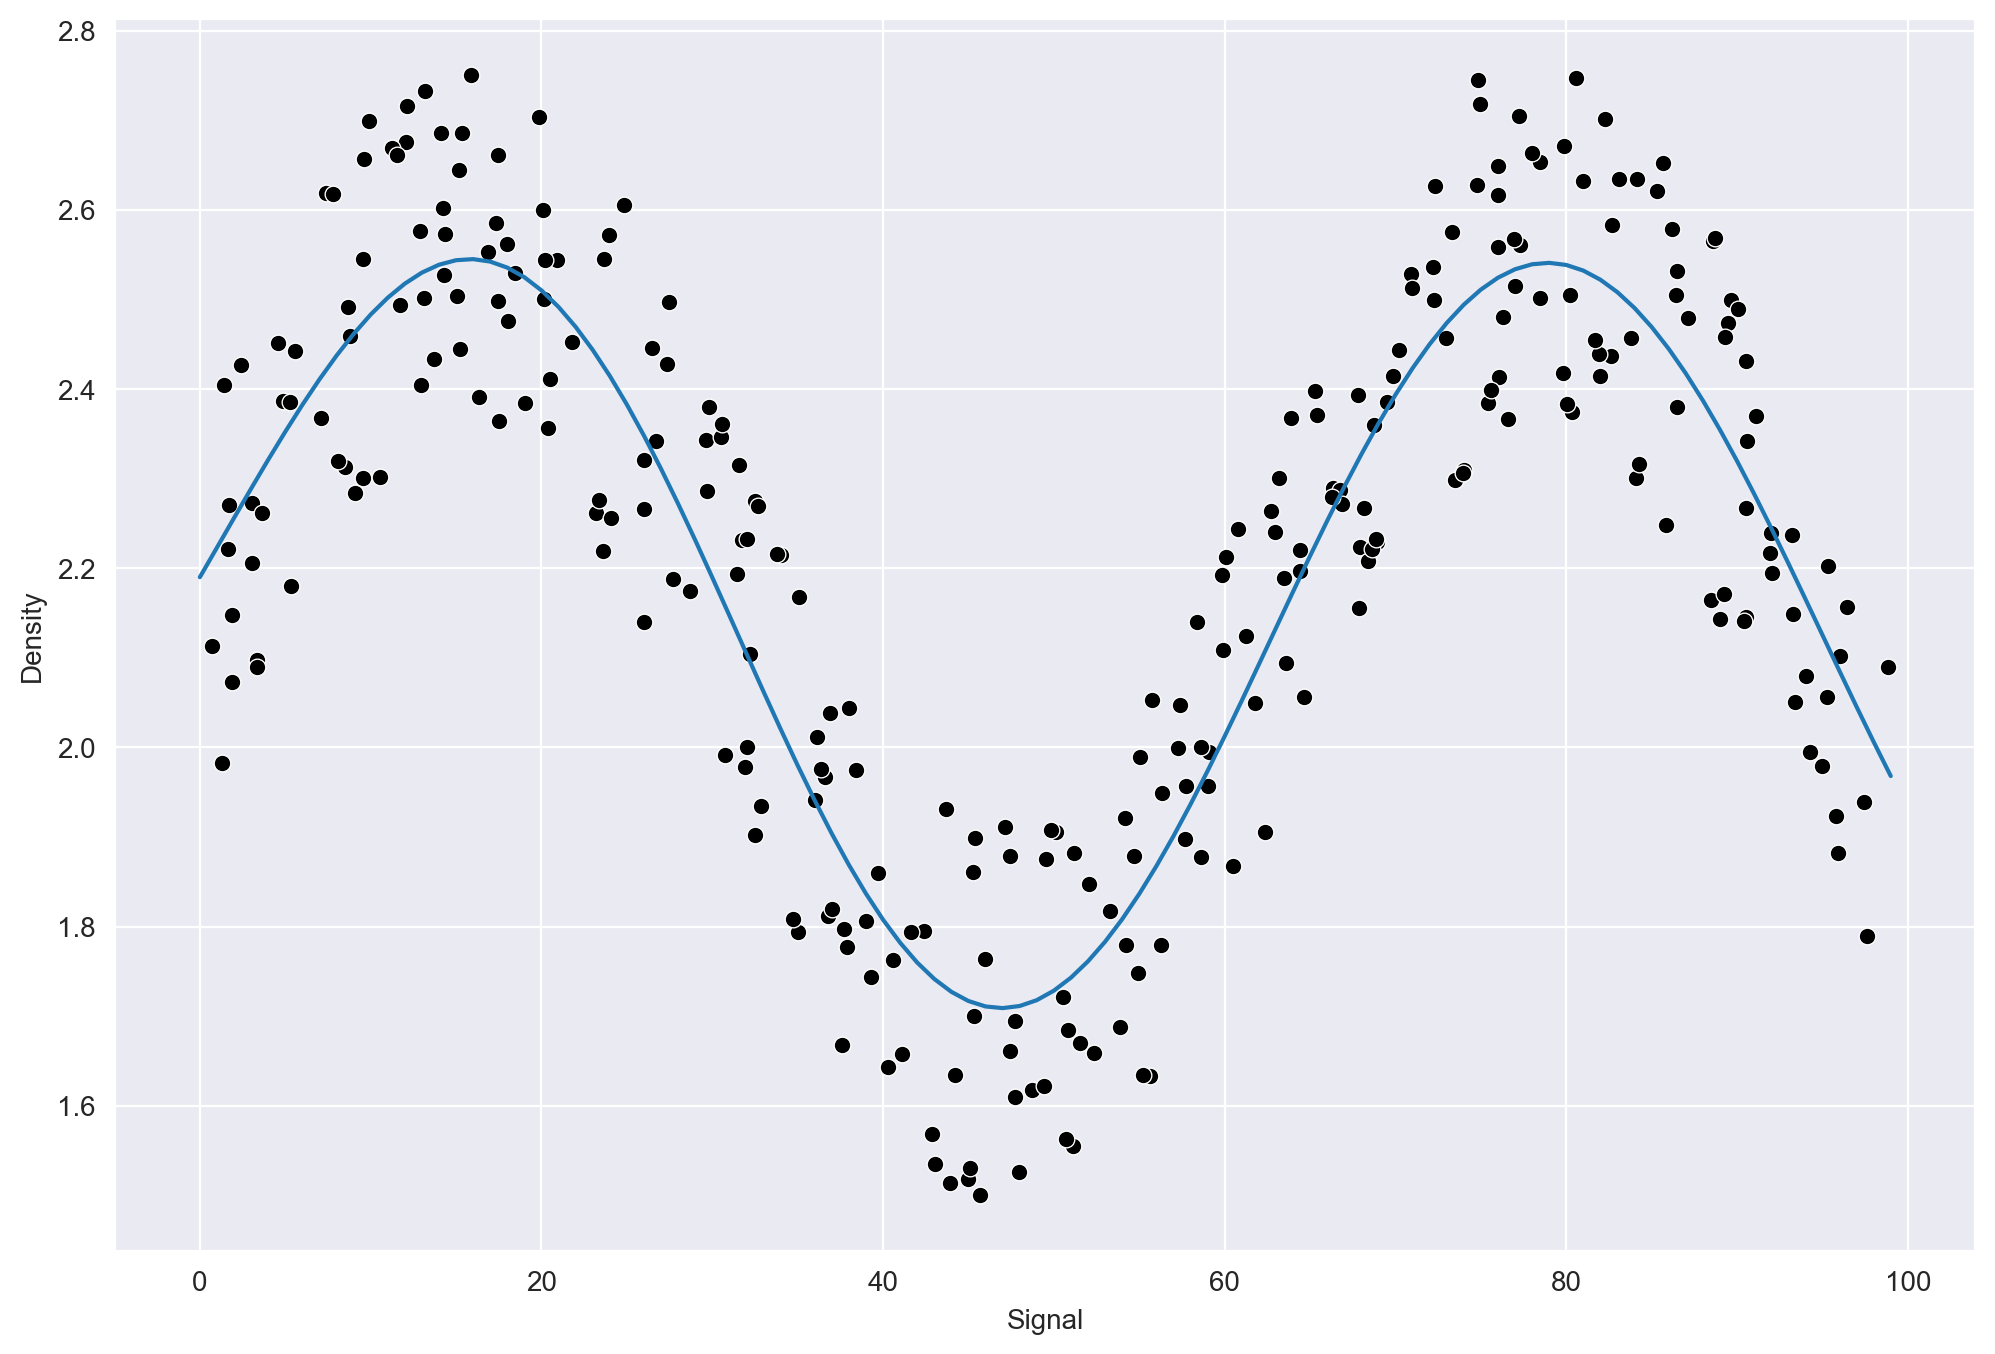

In [58]:
svr = SVR()
param_grid = {
    'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
    'gamma': ['auto', 'scale']
}
grid = GridSearchCV(svr, param_grid)

run_model(svr, X_train, y_train, X_test, y_test)

MAE: 0.1146498144027154
RMSE: 0.14232003584797048


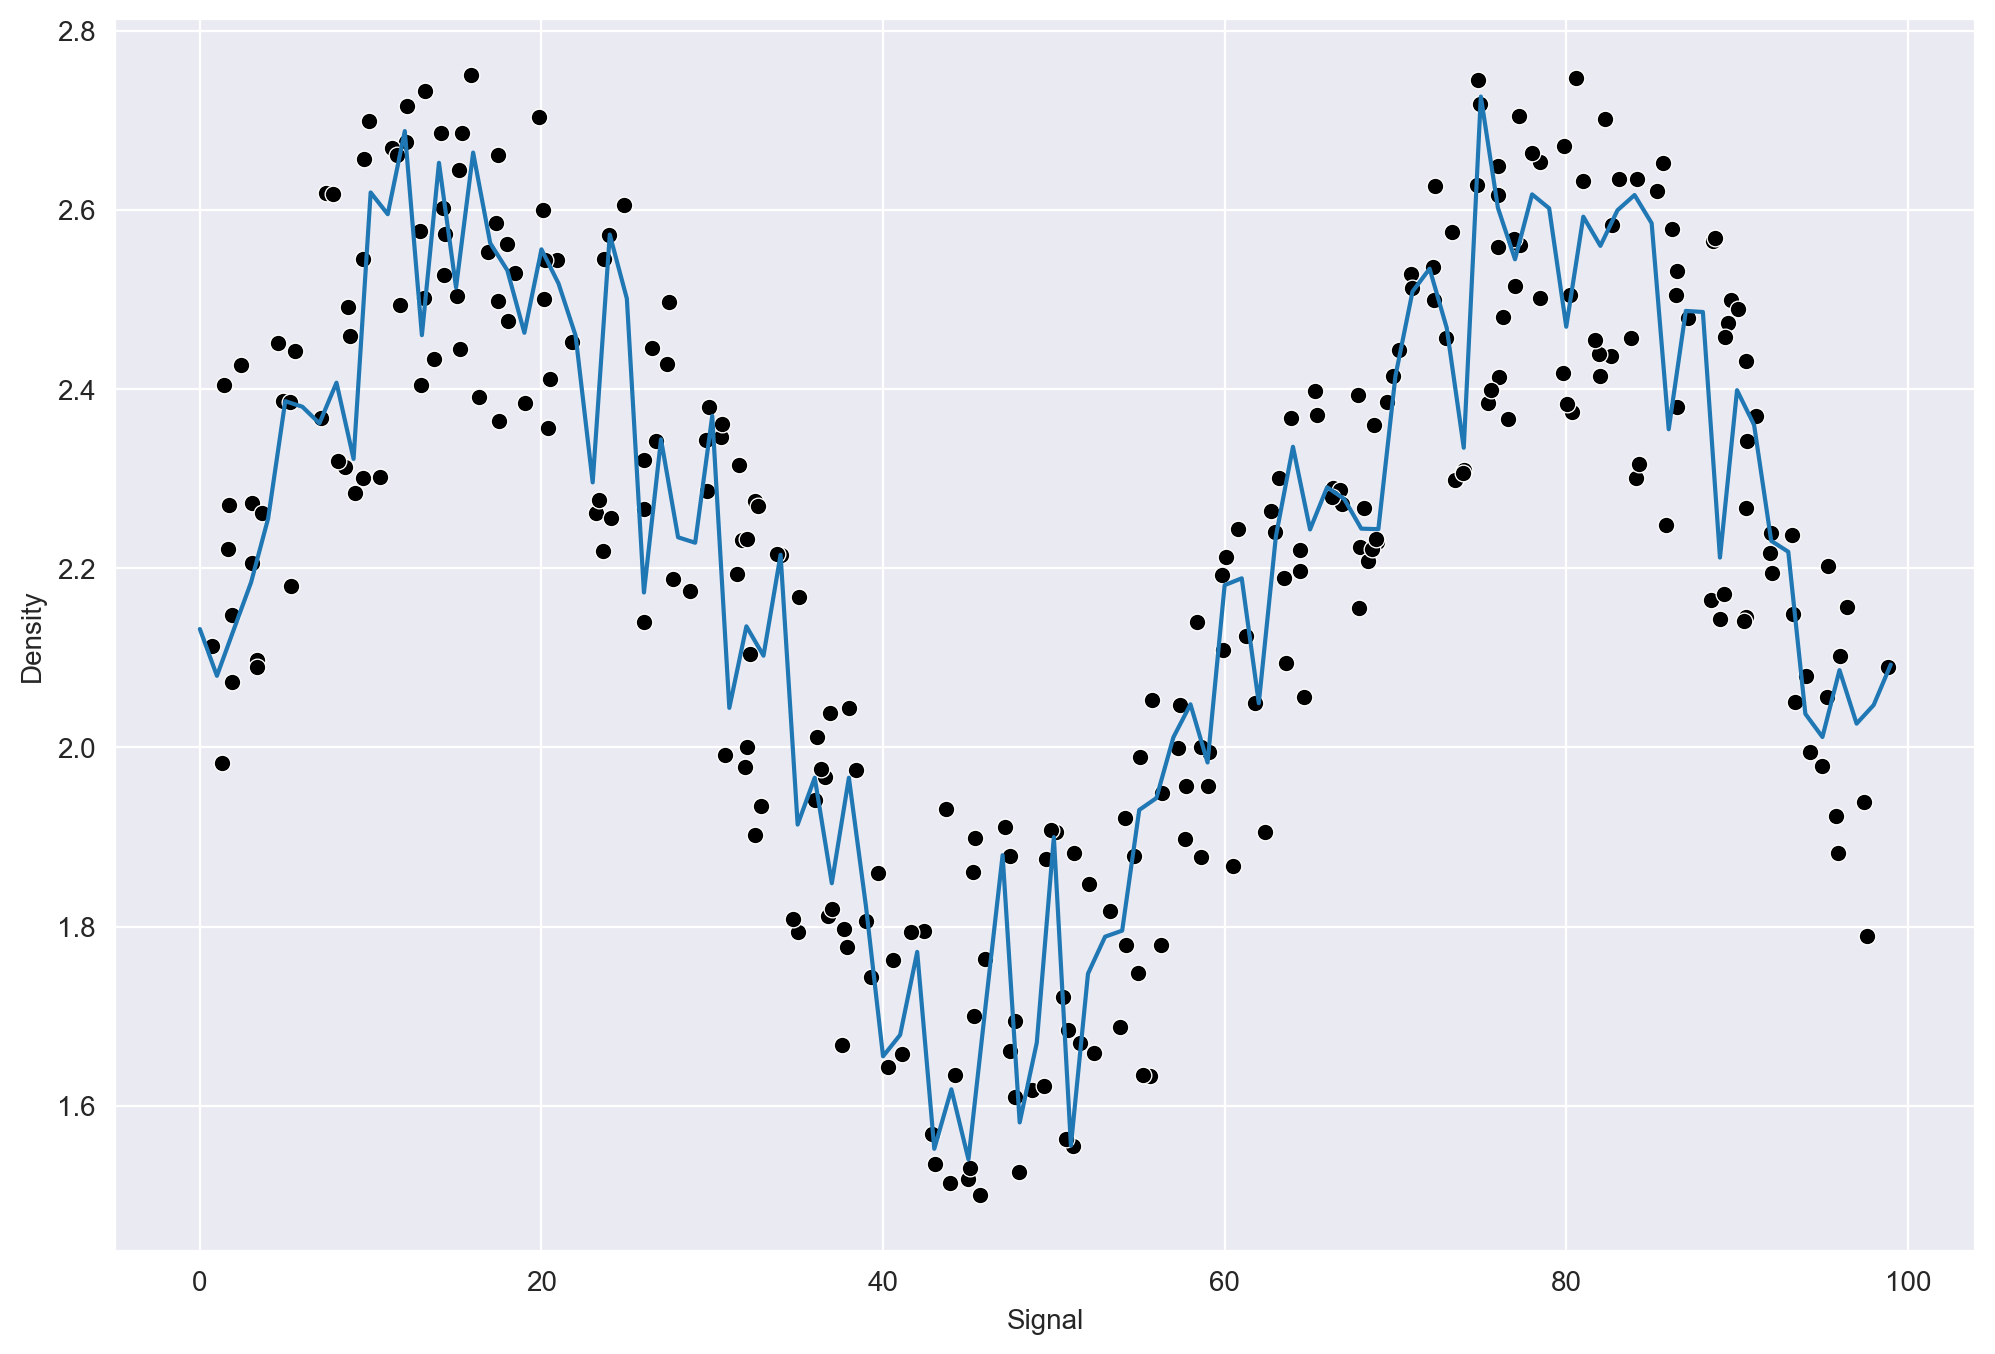

In [59]:
rfr = RandomForestRegressor(n_estimators=10)

run_model(rfr, X_train, y_train, X_test, y_test)

MAE: 0.11318284854800689
RMSE: 0.13294148649584667


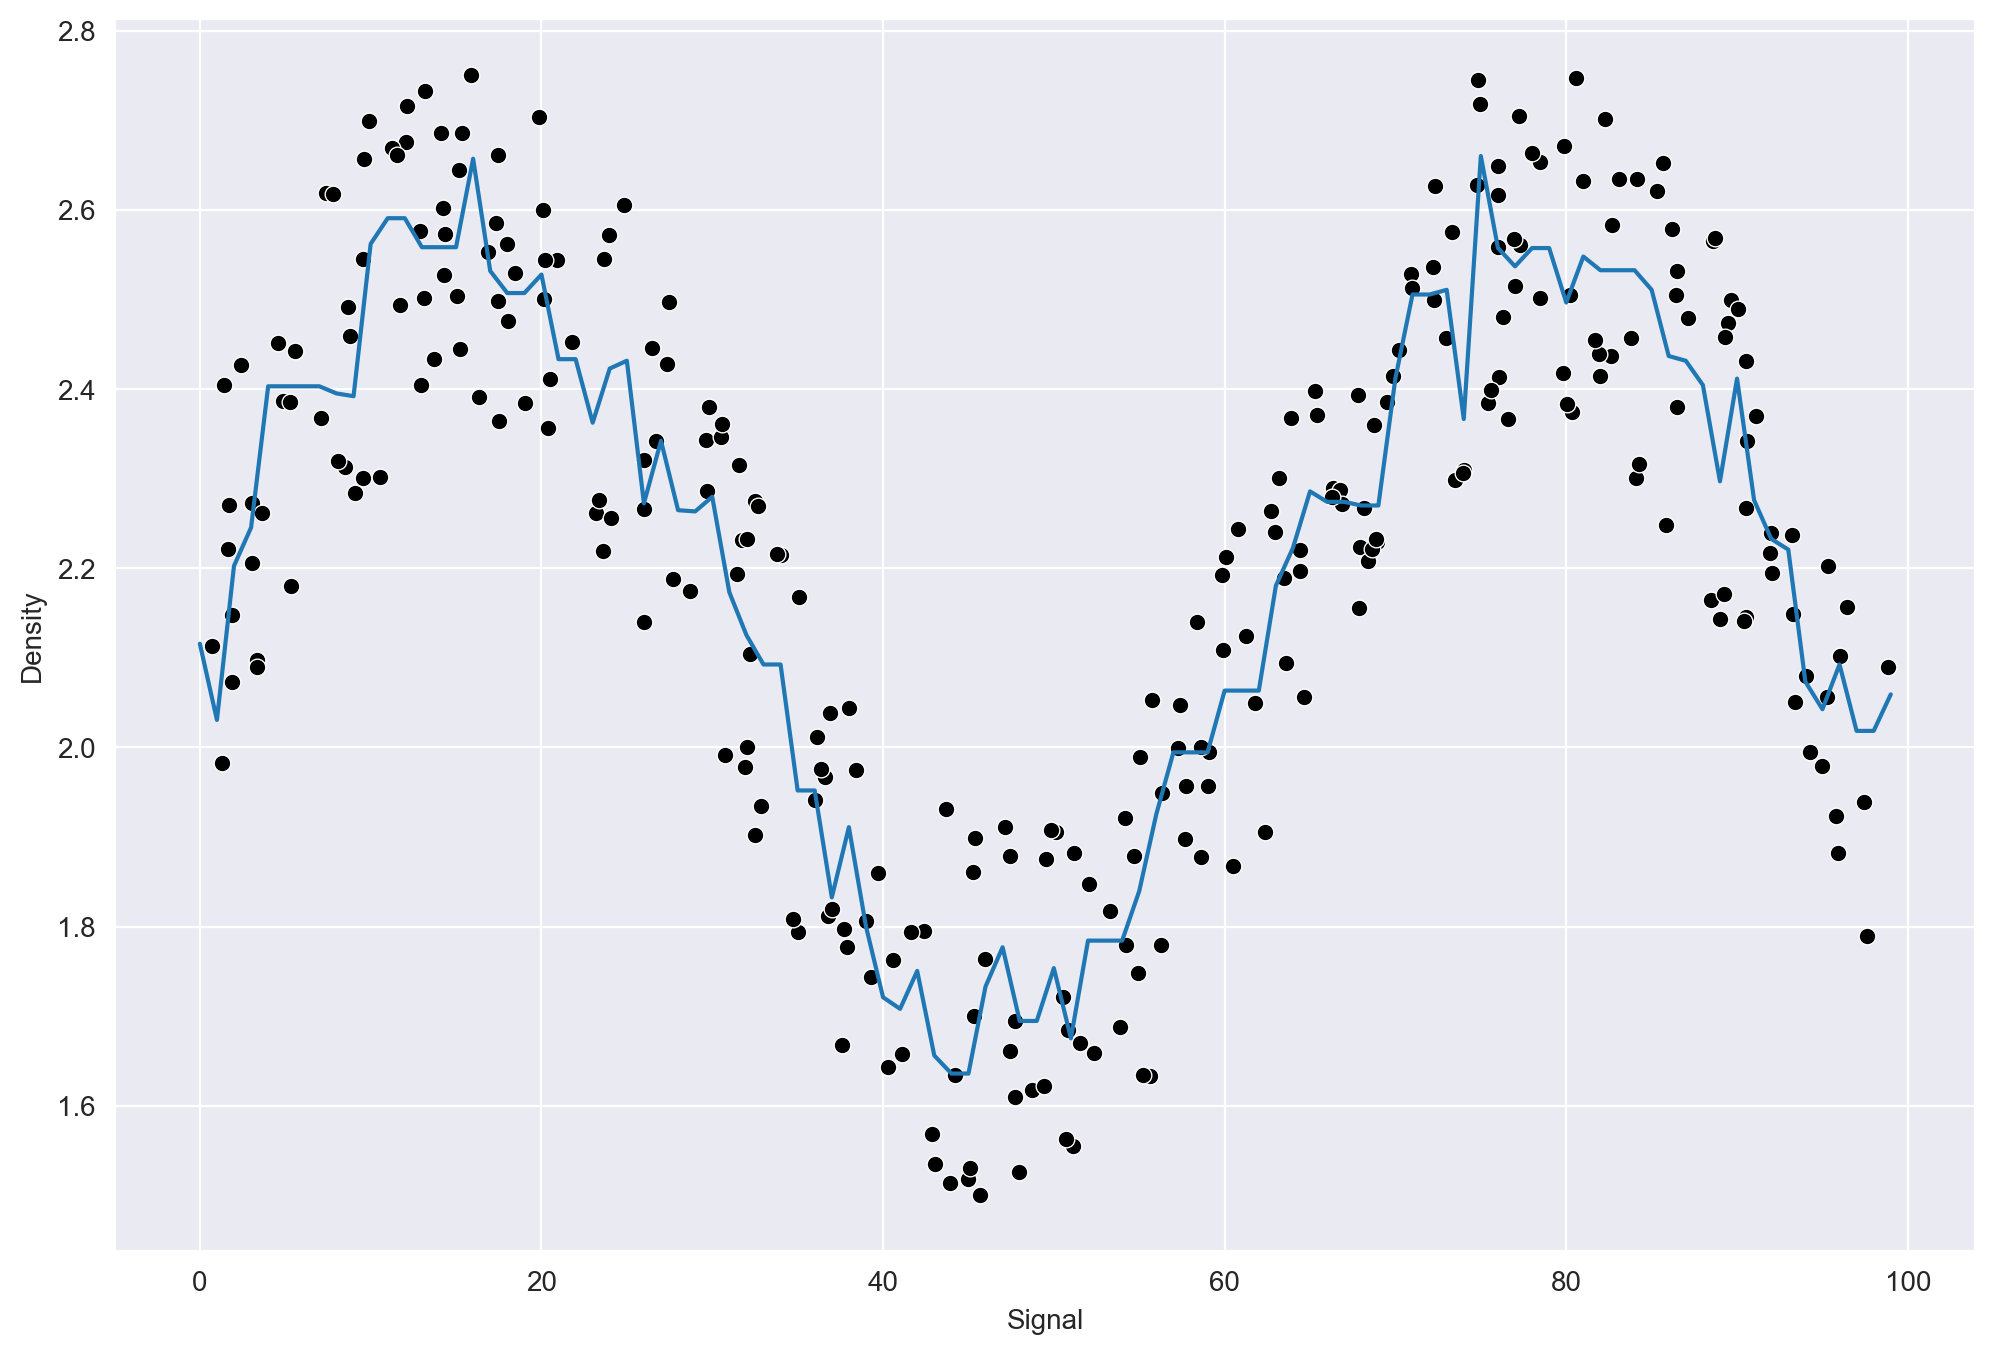

In [60]:
model = GradientBoostingRegressor()

run_model(model, X_train, y_train, X_test, y_test)

MAE: 0.11696871065324024
RMSE: 0.1375116422140682


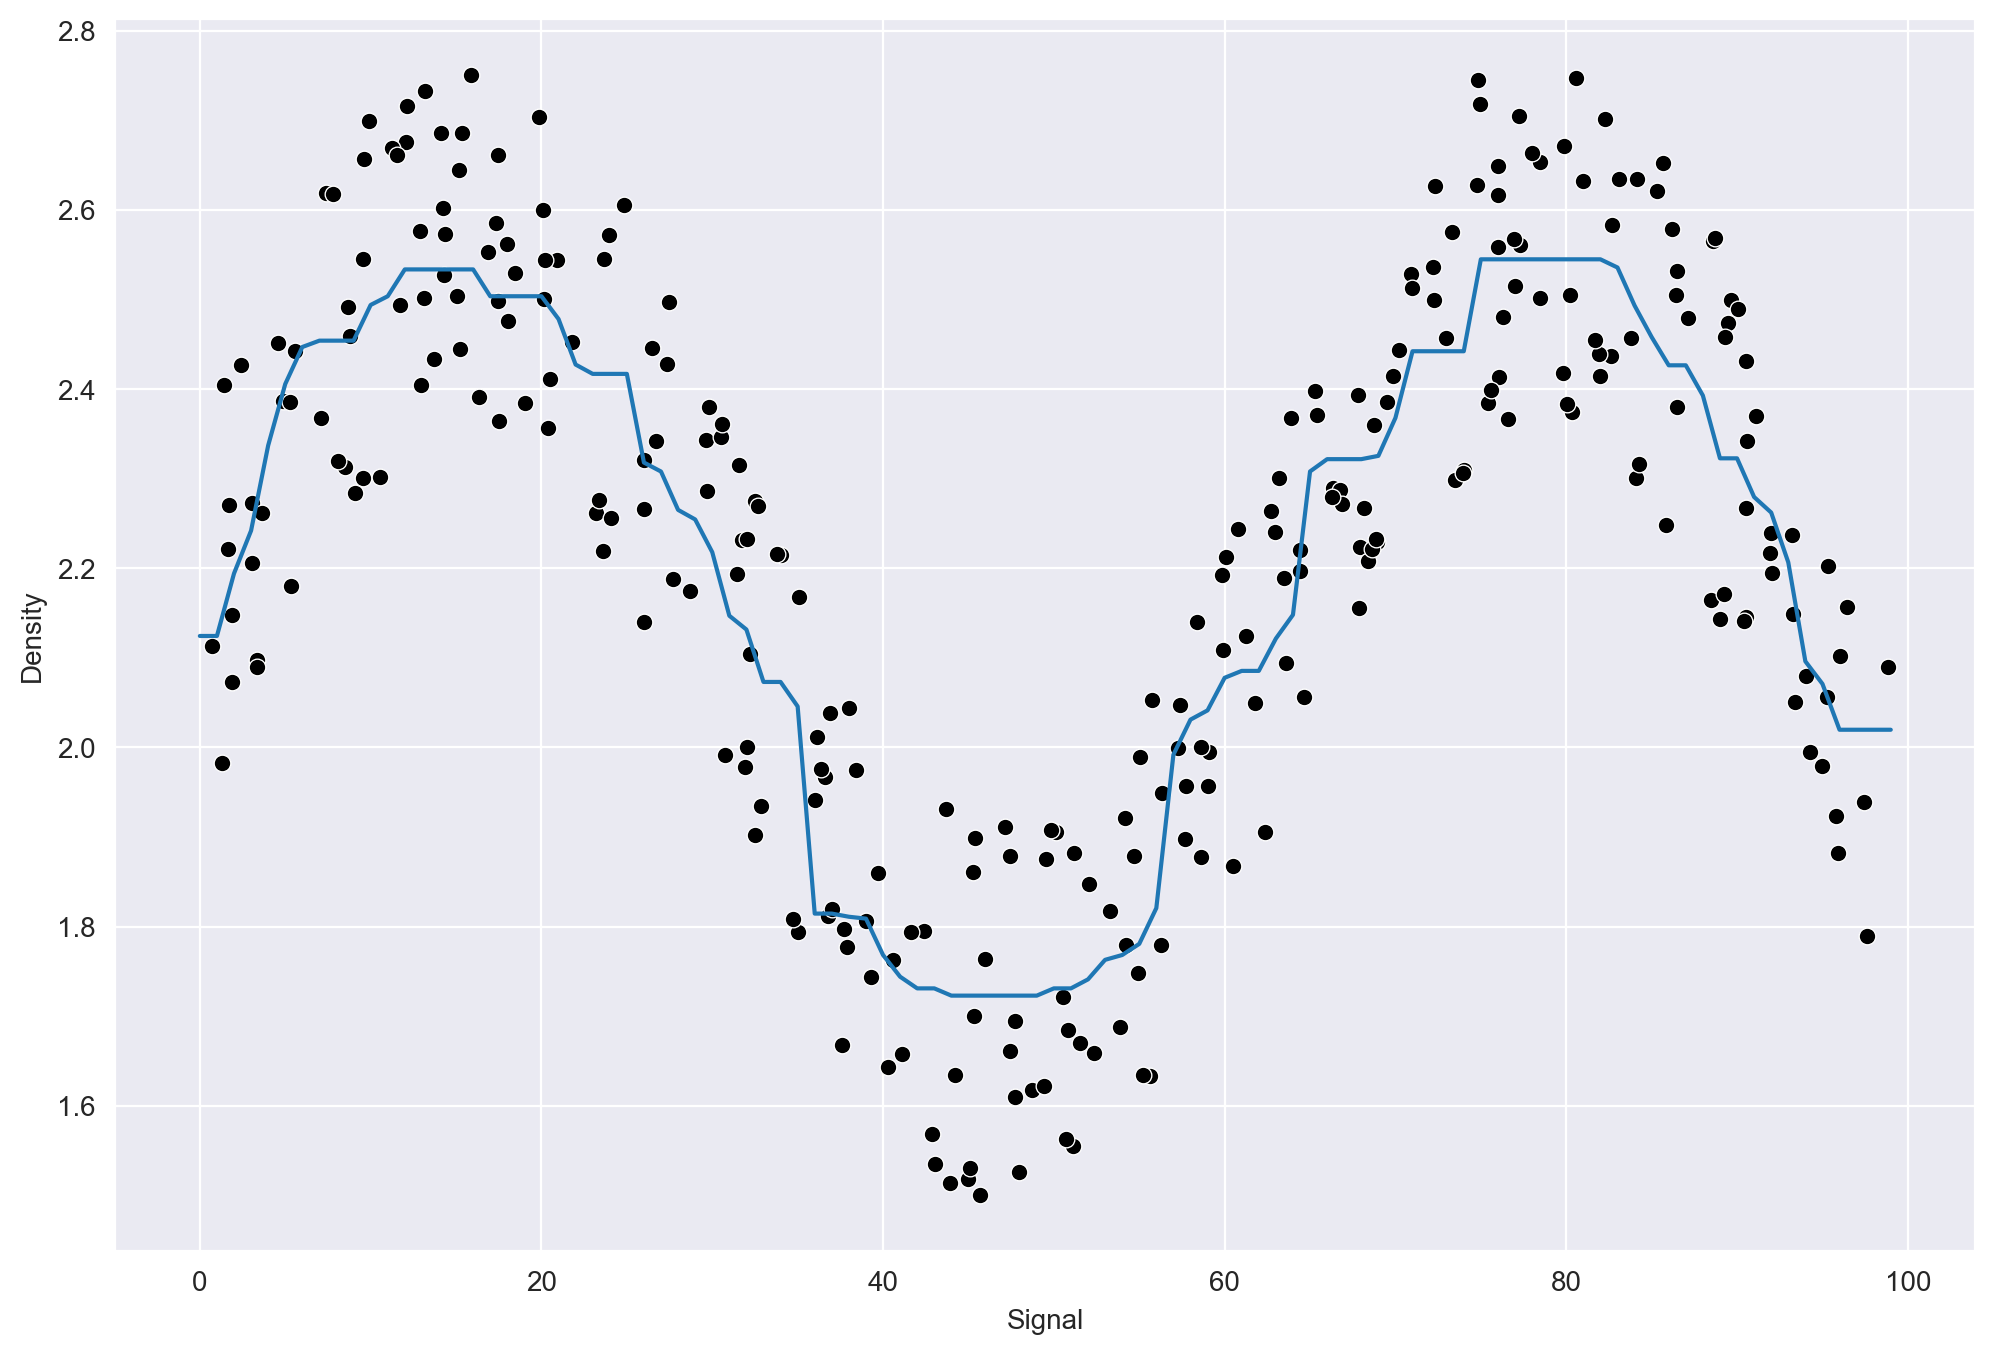

In [61]:
model = AdaBoostRegressor()

run_model(model, X_train, y_train, X_test, y_test)